<a href="https://colab.research.google.com/github/lovedatascience1/AcademyPublic/blob/main/Boats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Boat price
#### Here is the script to get the data directly from kaggle through colab

!pip install -q kaggle
from google.colab import files
files.upload()
#create a kaggle folder
!mkdir ~/.kaggle

# Go on kaggle > Account > Create New API token
# Save the json file in your laptop in a dedicated folder

# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Datasets available here: 
# https://www.kaggle.com/datasets/artemkorottchenko/large-boatyacht-pricing-dataset
!kaggle datasets download -d artemkorottchenko/large-boatyacht-pricing-dataset
!unzip large-boatyacht-pricing-dataset.zip

#### End of the script to get the data directly from kaggle through colab
# Remember that when you run it, you have to click on the button Choose Files and 
# then select the kaggle.json file from your computer

Saving kaggle.json to kaggle.json
 80% 5.00M/6.22M [00:00<00:00, 23.7MB/s]
100% 6.22M/6.22M [00:00<00:00, 28.9MB/s]
Archive:  large-boatyacht-pricing-dataset.zip
  inflating: boat_dataset.csv        


# New Section

Import dataset from kaggle


In [2]:
import pandas as pd
import io
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50
df = pd.read_csv('/content/boat_dataset.csv', encoding='latin1')

df = pd.read_csv(io.StringIO(open('/content/boat_dataset.csv', 'rb').read().decode('utf-8', errors='ignore')), sep=",")
df.head()

,Price,Category,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length,Width,Depth,Displacement,CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Advertisement Date,Number of views last 7 days,Comments,Additional Comments,Equipment
0,"CHF 3.337,-",Power Boats,Motor Yacht,Rigiflex power boats,CAP 400,NaN,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake Geneva » Vésenaz,NaN,226,NaN,Possibility to arrange it with a complete luxu...,NaN
1,"EUR 3.490,-",Power Boats,Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bönningstedt,NaN,75,"In den Farben weiß oder grün lieferbar.,,2 abs...",NaN,NaN
2,"CHF 3.770,-",Power Boats,Sport Boat,Marine power boats,370 S - Aluboot,NaN,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake of Zurich » Stäfa ZH,NaN,124,NaN,The lightweight and sleek rowing boat for 4 pe...,NaN
3,"DKK 25.900,-",Power Boats,Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,64,"MORSOM OG LETKØRT KVALITETSBÅD!,Nye Pioner 10 ...",NaN,NaN
4,"SEK 35.000,-",Power Boats,Classic,NaN,Gullholmensnipa 21,NaN,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee » Västra Frölunda,04.07.2020,131,NaN,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C..."


# EDA


Explore dataframe: columns, shape, description

In [3]:
df.shape

(10344, 38)

In [4]:
df.columns

Index(['Price', 'Category', 'Boat Type', 'Manufacturer', 'Model', 'Boat name',
       'Type', 'Year Built', 'Condition', 'Length', 'Width', 'Depth',
       'Displacement', 'CE Design Category', 'Cert Number of People',
       'Number of Cabins', 'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap', 'Holding Tank', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Cruising Speed', 'Location', 'Advertisement Date',
       'Number of views last 7 days', 'Comments', 'Additional Comments',
       'Equipment'],
      dtype='object')

In [5]:
df.info() # check datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10344 non-null  object 
 1   Category                     10344 non-null  object 
 2   Boat Type                    10344 non-null  object 
 3   Manufacturer                 8954 non-null   object 
 4   Model                        10341 non-null  object 
 5   Boat name                    1313 non-null   object 
 6   Type                         10339 non-null  object 
 7   Year Built                   9777 non-null   float64
 8   Condition                    3375 non-null   object 
 9   Length                       10334 non-null  object 
 10  Width                        10281 non-null  object 
 11  Depth                        7234 non-null   object 
 12  Displacement                 5051 non-null   object 
 13  CE Design Catego

In [6]:
df.describe()

,Year Built,Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers
count,9777.000000,3597.000000,6475.000000,6407.000000,2156.000000,463.000000,1941.000000
mean,2004.830725,9.355296,2.149035,4.345716,1.763915,1.289417,1.550747
std,16.309045,24.037107,2.145005,3.974223,2.076365,0.653360,0.930096
min,1885.000000,1.000000,-1.000000,-23.000000,1.000000,1.000000,1.000000
25%,1999.000000,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2008.000000,8.000000,2.000000,4.000000,1.000000,1.000000,1.000000
75%,2017.000000,10.000000,3.000000,6.000000,2.000000,1.000000,2.000000
max,2021.000000,1200.000000,96.000000,266.000000,84.000000,6.000000,10.000000


In [7]:
# Let's see if we have constant features
col_object_l = df.select_dtypes(include='object').columns # Stock les colonnes

for col in col_object_l:
    print(f"Column {col} has {df[col].nunique()} categories\n")

Column Price has 3283 categories

Column Category has 1 categories

Column Boat Type has 135 categories

Column Manufacturer has 932 categories

Column Model has 7458 categories

Column Boat name has 1258 categories

Column Type has 36 categories

Column Condition has 10 categories

Column Length has 1628 categories

Column Width has 580 categories

Column Depth has 264 categories

Column Displacement has 1380 categories

Column CE Design Category has 4 categories

Column Hull Color has 377 categories

Column Material has 11 categories

Column Fresh Water Cap has 287 categories

Column Holding Tank has 104 categories

Column Propulsion has 8 categories

Column Engine has 4752 categories

Column Engine Performance has 843 categories

Column Fuel Capacity has 716 categories

Column Fuel Type has 6 categories

Column Engine Hours has 996 categories

Column Max Speed has 99 categories

Column Cruising Speed has 57 categories

Column Location has 3177 categories

Column Advertisement Date h

Visualize missing data

In [8]:
import missingno

print("Missingno Version : {}".format(missingno.__version__))
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Missingno Version : 0.5.1


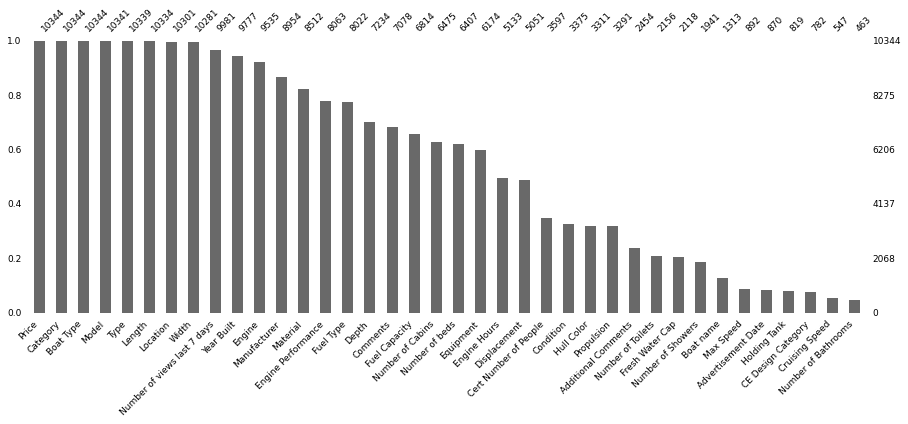

In [9]:
missingno.bar(df, sort="descending", figsize=(15,5), fontsize=9)

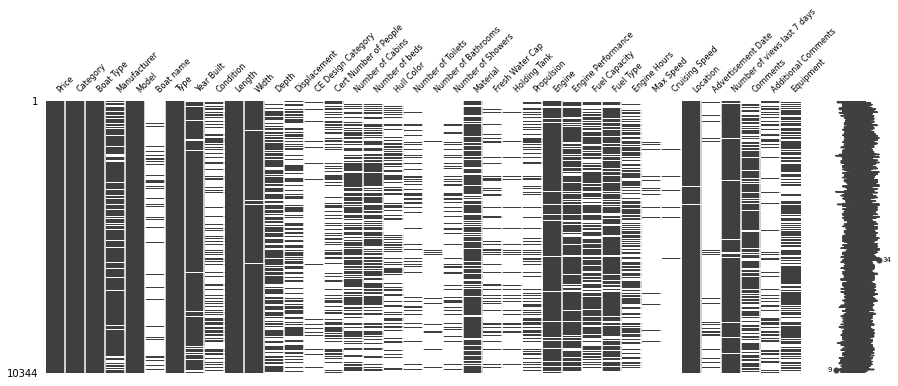

In [10]:
missingno.matrix(df,figsize=(15,5), fontsize=8);

# Data cleaning

In [11]:
df = df.drop(columns='Category') # Category has just one category

In [12]:
# Let's delete the features that we can't use:
list_col_to_delete_part1 = ["Displacement", "Number of views last 7 days", "Comments", "Additional Comments"]

df.drop(columns = list_col_to_delete_part1, inplace = True)

In [13]:
df.shape

(10344, 33)

In [14]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Model', 'Boat name', 'Type',
       'Year Built', 'Condition', 'Length', 'Width', 'Depth',
       'CE Design Category', 'Cert Number of People', 'Number of Cabins',
       'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap', 'Holding Tank', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Cruising Speed', 'Location', 'Advertisement Date',
       'Equipment'],
      dtype='object')

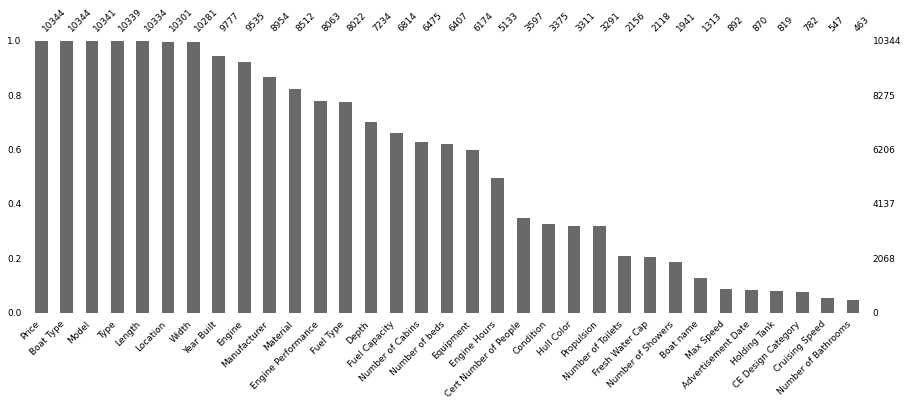

In [15]:
missingno.bar(df, sort="descending", figsize=(15,5), fontsize=9)

In [16]:
df.head(10)

,Price,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length,Width,Depth,CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Advertisement Date,Equipment
0,"CHF 3.337,-",Motor Yacht,Rigiflex power boats,CAP 400,NaN,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake Geneva » Vésenaz,NaN,NaN
1,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bönningstedt,NaN,NaN
2,"CHF 3.770,-",Sport Boat,Marine power boats,370 S - Aluboot,NaN,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake of Zurich » Stäfa ZH,NaN,NaN
3,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,NaN
4,"SEK 35.000,-",Classic,NaN,Gullholmensnipa 21,NaN,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee » Västra Frölunda,04.07.2020,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C..."
5,"EUR 3.399,-",Fishing Boat,Linder power boats,355 Sportsman,NaN,new boat from stock,2019.0,new,3.55 m,1.46 m,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bayern » München,NaN,NaN
6,"CHF 3.650,-",Sport Boat,Linder power boats,Fishing 410 (Aluminiumboot),NaN,new boat from stock,NaN,NaN,4.03 m,1.56 m,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake Constance » Uttwil,NaN,NaN
7,"CHF 3.600,-",Catamaran,NaN,Stoll SA Yverdon,NaN,"Used boat,Unleaded",1999.0,well-groomed,6.20 m,2.38 m,0.40 m,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,"Outboard, four-stroke",Yamaha F8 BMH 5.6 kW,NaN,40 l,Unleaded,NaN,NaN,NaN,Switzerland » Neuenburgersee » Yvonand,02.06.2020,"Anchor,Mooring Cover,Swim Ladder,Trailer"
8,"DKK 24.800,-",Sport Boat,NaN,Crazy One,NaN,Used boat,NaN,NaN,3.00 m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 x 15 HP / 11 kW,1 x 15 HP / 11 kW,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,NaN
9,"EUR 3.333,-",Fishing Boat,Crescent power boats,364 Rodd 2.5 Pack,NaN,new boat from stock,2019.0,NaN,3.64 m,1.37 m,NaN,NaN,NaN,NaN,NaN,white white,NaN,NaN,NaN,NaN,NaN,NaN,"Outboard, four-stroke",Suzuki DF 2.5,1 x 2 HP / 1.5 kW,NaN,NaN,NaN,NaN,NaN,Germany » Bayern » Boote+service Oberbayern,NaN,Full Enclosure


##  Advertisement Date


Advertisment Date

In [17]:
df['Advertisement Date'].unique()

array([nan, '04.07.2020', '02.06.2020', '22.07.2020', '06.07.2020',
       '26.06.2020', '07.07.2020', '14.07.2020', '17.07.2020',
       '15.07.2020', '13.07.2020', '20.07.2020', '25.07.2020',
       '16.06.2020', '25.06.2020', '21.06.2020', '23.07.2020',
       '15.06.2020', '17.06.2020', '29.06.2020', '24.07.2020',
       '19.06.2020', '18.06.2020', '04.06.2020', '01.07.2020',
       '16.07.2020', '03.06.2020', '12.06.2020', '11.07.2020',
       '21.07.2020', '22.06.2020', '07.06.2020', '27.07.2020',
       '30.05.2020', '02.07.2020', '24.05.2020', '27.06.2020',
       '12.07.2020', '19.07.2020', '08.06.2020', '01.06.2020',
       '28.06.2020', '10.07.2020', '12.04.2020', '16.05.2020',
       '18.05.2020', '31.05.2020', '29.05.2020', '09.07.2020',
       '26.07.2020', '05.04.2020', '01.05.2020', '03.07.2020',
       '14.06.2020', '05.06.2020', '05.07.2020', '06.06.2020',
       '30.06.2020', '09.06.2020', '24.06.2020', '23.06.2020',
       '11.06.2020', '25.05.2020', '08.07.2020', '

In [18]:
## Add element in the database for EDUCATIONAL PURPOSE ONLY
# Add random date in order to do a proper temporal split
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format='%d.%m.%Y')
#Here is a function that will automatically create a feature of random dates between a defined interval
def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds 
    (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to 
    the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by 
    the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit)


In [19]:

np.random.seed(893717398)
# Set parameters
d_start = pd.to_datetime('2020-01-01')
d_end = pd.to_datetime('2021-12-31')

# Delete initial Advertisement Date -> if you want to keep the inital dates, don't run it
df.drop(columns=['Advertisement Date'], inplace=True)

# Run function
df['Advertisement Date'] = random_datetimes_or_dates(d_start, d_end, out_format='datetime', n=len(df))

# Keep the date and remove the time
df['Advertisement Date']= df['Advertisement Date'].dt.date

# Parse the date
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format='%Y-%m-%d')

# Impute Advertissement Date by the the created one when they are missing
#df['Advertisement Date'] = np.where(df['Advertisement Date'].isna(), df['date2'], df['Advertisement Date'])

# Delete the random date created
#df.drop(columns=['date2'], inplace=True)

# Create duplicates
temp = df.sample(n=500, random_state=893717398)
df = df.append(temp)
del(temp)
df.reset_index(drop=True, inplace=True)

df['Advertisement Date'] = df['Advertisement Date'].astype(str)

In [20]:
# Need to parse the date
# For the moment, python understand Advertisement Date as a chain of characters
# You need to tell him that this is a Date
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format="%Y-%m-%d") 

In [21]:
df['Advertisement Date'].head()

0   2021-08-11
1   2020-08-19
2   2021-01-06
3   2020-08-01
4   2021-05-05
Name: Advertisement Date, dtype: datetime64[ns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Price                  10844 non-null  object        
 1   Boat Type              10844 non-null  object        
 2   Manufacturer           9393 non-null   object        
 3   Model                  10841 non-null  object        
 4   Boat name              1370 non-null   object        
 5   Type                   10839 non-null  object        
 6   Year Built             10252 non-null  float64       
 7   Condition              3540 non-null   object        
 8   Length                 10834 non-null  object        
 9   Width                  10779 non-null  object        
 10  Depth                  7575 non-null   object        
 11  CE Design Category     828 non-null    object        
 12  Cert Number of People  3773 non-null   float64       
 13  N

In [23]:
df['Length'].unique()
df['Engine Hours'].unique()
df['Fresh Water Cap'].unique()


array([nan, '70 l', '205 l', '100 l', '40 l', '60 l', '80 l', '50 l',
       '250 l', '200 l', '160 l', '35 l', '150 l', '75 l', '180 l',
       '30 l', '280 l', '43 l', '120 l', '340 l', '45 l', '38 l', '300 l',
       '20 l', '130 l', '108 l', '114 l', '400 l', '65 l', '500 l',
       '55 l', '133 l', '600 l', '700 l', '90 l', '47 l', '37 l', '800 l',
       '32 l', '78 l', '125 l', '380 l', '165 l', '1100 l', '42 l',
       '56 l', '110 l', '350 l', '76 l', '1000 l', '290 l', '450 l',
       '240 l', '900 l', '220 l', '68 l', '155 l', '1200 l', '82 l',
       '113 l', '225 l', '170 l', '188 l', '520 l', '135 l', '330 l',
       '325 l', '190 l', '74 l', '576 l', '98 l', '106 l', '389 l',
       '2000 l', '227 l', '430 l', '650 l', '215 l', '333 l', '1400 l',
       '588 l', '73 l', '378 l', '370 l', '1025 l', '470 l', '750 l',
       '640 l', '1300 l', '425 l', '212 l', '720 l', '320 l', '107 l',
       '550 l', '375 l', '285 l', '560 l', '270 l', '436 l', '360 l',
       '1800 l', 

In [24]:
# Delete the chain ' m'
df['Length'] = df['Length'].str.rstrip(' m')

# Convert Series in numeric
df['Length'] = pd.to_numeric(df['Length'])

df['Length'].head()

0    4.00
1    4.00
2    3.69
3    3.00
4    6.30
Name: Length, dtype: float64

In [25]:
def format_series(series, char):
    
    new_series = series.str.rstrip(char)
    new_series = pd.to_numeric(new_series)
    
    return new_series

In [26]:
for col in ['Width', 'Depth']:
    df[col] = format_series(df[col], ' m')

df["Engine Hours"] = format_series(df["Engine Hours"], ' h')

for col in ['Fresh Water Cap', 'Holding Tank', 'Fuel Capacity']:
    df[col] = format_series(df[col], ' l')
    
df[['Length', 'Width', 'Depth']].head()

df = df.rename(columns={'Length':'Length (m)', 'Width':'Width (m)', 'Depth':'Depth (m)',
                        'Fresh Water Cap':'Fresh Water Cap (l)', 'Holding Tank':'Holding Tank (l)', 'Fuel Capacity':'Fuel Capacity (l)'})



In [27]:
df.head(5)

,Price,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Equipment,Advertisement Date
0,"CHF 3.337,-",Motor Yacht,Rigiflex power boats,CAP 400,NaN,new boat from stock,2017.0,as new,4.00,1.90,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake Geneva » Vésenaz,NaN,2021-08-11
1,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bönningstedt,NaN,2020-08-19
2,"CHF 3.770,-",Sport Boat,Marine power boats,370 S - Aluboot,NaN,new boat from stock,NaN,NaN,3.69,1.42,0.25,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake of Zurich » Stäfa ZH,NaN,2021-01-06
3,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-08-01
4,"SEK 35.000,-",Classic,NaN,Gullholmensnipa 21,NaN,Used boat,1974.0,good,6.30,2.50,0.75,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50.0,NaN,500.0,NaN,NaN,Nordsee » Västra Frölunda,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",2021-05-05


## Split


In [28]:
# Now let's split the data in 2 parts for the moment:
# train_val & test
# Split will be done on a temporal basis
df.set_index(['Advertisement Date']).resample('M').size()

Advertisement Date
2020-01-31    442
2020-02-29    463
2020-03-31    447
2020-04-30    426
2020-05-31    478
2020-06-30    422
2020-07-31    468
2020-08-31    500
2020-09-30    464
2020-10-31    433
2020-11-30    415
2020-12-31    470
2021-01-31    463
2021-02-28    407
2021-03-31    475
2021-04-30    456
2021-05-31    484
2021-06-30    434
2021-07-31    443
2021-08-31    431
2021-09-30    428
2021-10-31    517
2021-11-30    437
2021-12-31    441
Freq: M, dtype: int64

In [29]:
# Let's have Train & Validation for the data of 2020 and Test for the data of 2021
train_val = df[df['Advertisement Date'] < '2021-01-01'].reset_index(drop=True)

# Création du test
test = df[df['Advertisement Date'] >= '2021-01-01'].reset_index(drop=True)

The fundamental hypothesis for every predictive modeling is the independancy all the observations. However, algorithms will put a highest weight / importance to the some observation.

First step is to identify the duplicates.

When all the features have the same values for several observations, it is what I call 'true duplicates'. To treat them, we can keep the fist value.

## Duplicates

In [30]:
train_val.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5423     True
5424     True
5425     True
5426     True
5427     True
Length: 5428, dtype: bool

In [31]:
print(f'The database has {train_val[train_val.duplicated(keep=False)].shape[0]} true duplicates')


The database has 488 true duplicates


In [32]:
train_val[train_val.duplicated(keep=False)].sort_values(by='Model')[:10] 

,Price,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Equipment,Advertisement Date
4746,"EUR 25.000,-",Motor Yacht,Altena power boats,10,Mulmeli,Used boat,1972.0,NaN,10.00,3.20,1.10,NaN,NaN,NaN,2.0,White,NaN,NaN,NaN,Steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands » onbekend,NaN,2020-08-17
5241,"EUR 25.000,-",Motor Yacht,Altena power boats,10,Mulmeli,Used boat,1972.0,NaN,10.00,3.20,1.10,NaN,NaN,NaN,2.0,White,NaN,NaN,NaN,Steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands » onbekend,NaN,2020-08-17
5246,"EUR 229.000,-",Trawler,Altena power boats,126 Family,Aventura,"Used boat,Diesel",2012.0,NaN,12.66,3.95,1.27,NaN,NaN,NaN,3.0,Beige,NaN,NaN,NaN,Steel,NaN,NaN,NaN,Vetus Deutz DTA44,1 x 1 HP / 0.7 kW,1490.0,Diesel,475.0,NaN,NaN,Netherlands » In verkoophaven,"Air Conditioning,Anchor,Autopilot,Battery,Batt...",2020-04-01
2643,"EUR 229.000,-",Trawler,Altena power boats,126 Family,Aventura,"Used boat,Diesel",2012.0,NaN,12.66,3.95,1.27,NaN,NaN,NaN,3.0,Beige,NaN,NaN,NaN,Steel,NaN,NaN,NaN,Vetus Deutz DTA44,1 x 1 HP / 0.7 kW,1490.0,Diesel,475.0,NaN,NaN,Netherlands » In verkoophaven,"Air Conditioning,Anchor,Autopilot,Battery,Batt...",2020-04-01
2203,"EUR 440.000,-","Cabin Boat,Motor Yacht,Offshore Boat",Performance power boats,1307,NaN,", ,, ,Used boat,Unleaded",2013.0,very good,13.33,3.40,1.00,NaN,12.0,2.0,6.0,NaN,NaN,2.0,NaN,GRP,230.0,NaN,Sterndrive,Mercruiser,3 x 430 HP / 316 kW,1300.0,Unleaded,330.0,NaN,NaN,Italy » Lake Garda » Gardasee,"Air Conditioning,Anchor,Autopilot,Battery,Batt...",2020-09-18
5301,"EUR 440.000,-","Cabin Boat,Motor Yacht,Offshore Boat",Performance power boats,1307,NaN,", ,, ,Used boat,Unleaded",2013.0,very good,13.33,3.40,1.00,NaN,12.0,2.0,6.0,NaN,NaN,2.0,NaN,GRP,230.0,NaN,Sterndrive,Mercruiser,3 x 430 HP / 316 kW,1300.0,Unleaded,330.0,NaN,NaN,Italy » Lake Garda » Gardasee,"Air Conditioning,Anchor,Autopilot,Battery,Batt...",2020-09-18
5372,"CHF 34.150,-",Bowrider,AMT power boats,175 BR,NaN,new boat from stock,2019.0,as new,5.15,2.08,0.60,NaN,6.0,NaN,NaN,white white,NaN,NaN,NaN,GRP,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Vierwaldstättersee » Beckenried,"Anchor,Battery,Bimini Top,Compass,Depth Instru...",2020-01-28
4581,"CHF 34.150,-",Bowrider,AMT power boats,175 BR,NaN,new boat from stock,2019.0,as new,5.15,2.08,0.60,NaN,6.0,NaN,NaN,white white,NaN,NaN,NaN,GRP,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Vierwaldstättersee » Beckenried,"Anchor,Battery,Bimini Top,Compass,Depth Instru...",2020-01-28
5305,"EUR 69.000,-","Classic,Motor Yacht",Spertini power boats,18 m,NaN,", ,Used boat,Diesel",1977.0,used,18.00,5.35,1.30,A - Ocean,10.0,3.0,6.0,white white,2.0,NaN,2.0,Wood,400.0,NaN,Inboard with Shaft,GM V 12,NaN,1800.0,Diesel,NaN,NaN,NaN,Spain » Mallorca » Palma,NaN,2020-08-11
3783,"EUR 69.000,-","Classic,Motor Yacht",Spertini power boats,18 m,NaN,", ,Used boat,Diesel",1977.0,used,18.00,5.35,1.30,A - Ocean,10.0,3.0,6.0,white white,2.0,NaN,2.0,Wood,400.0,NaN,Inboard with Shaft,GM V 12,NaN,1800.0,Diesel,NaN,NaN,NaN,Spain » Mallorca » Palma,NaN,2020-08-11


In [33]:
train_val = train_val.drop_duplicates(keep='first')

Now let's identify the false duplicates.
In general we have a unique ID for a client, given that it is not the case in this databse, we will consider that an observation is unique if the observation are the same for those 5 features: ['Model', 'Type', 'Year Built','Location', 'Equipment']

In [34]:
# 5 features to represents a unique boat.
features_analyze_duplicates = ['Model', 'Type', 'Year Built','Location', 'Equipment']

# sort the features for a better display of the false duplicates
cols_sort = features_analyze_duplicates + [col for col in train_val.columns if col not in features_analyze_duplicates]

# false duplicates
train_val[train_val.duplicated(subset = features_analyze_duplicates, keep=False)][cols_sort].sort_values(by='Model')[:10]

,Model,Type,Year Built,Location,Equipment,Price,Boat Type,Manufacturer,Boat name,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Advertisement Date
687,210,"new boat from stock,Unleaded",2020.0,Germany » Berlin » Sea Ray Berlin,NaN,"EUR 63.380,-",Bowrider,Sea Ray power boats,Wakeboard,NaN,6.55,2.54,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 x 250 HP / 184 kW,1 x 250 HP / 184 kW,NaN,Unleaded,NaN,NaN,NaN,2020-08-19
686,210,"new boat from stock,Unleaded",2020.0,Germany » Berlin » Sea Ray Berlin,NaN,"EUR 63.380,-",Bowrider,Sea Ray power boats,Wakeboard,NaN,6.55,2.54,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 x 250 HP / 184 kW,1 x 250 HP / 184 kW,NaN,Unleaded,NaN,NaN,NaN,2020-01-06
667,210,"new boat from stock,Unleaded",2020.0,Germany » Berlin » Sea Ray Berlin,NaN,"EUR 60.040,-",Bowrider,Sea Ray power boats,NaN,NaN,6.55,2.54,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRP,NaN,NaN,NaN,1 x 250 HP / 184 kW,1 x 250 HP / 184 kW,NaN,Unleaded,NaN,NaN,NaN,2020-10-11
666,210,"new boat from stock,Unleaded",2020.0,Germany » Berlin » Sea Ray Berlin,NaN,"EUR 60.040,-",Bowrider,Sea Ray power boats,NaN,NaN,6.55,2.54,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRP,NaN,NaN,NaN,1 x 250 HP / 184 kW,1 x 250 HP / 184 kW,NaN,Unleaded,NaN,NaN,NaN,2020-04-14
3717,29 Ft. OC,Used boat,2001.0,Netherlands » In verkoophaven,NaN,"EUR 72.500,-",Classic,Rapsody power boats,Skoet,NaN,8.74,2.45,0.65,NaN,10.0,NaN,2.0,Brown,NaN,NaN,NaN,Wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-25
775,29 Ft. OC,Used boat,2001.0,Netherlands » In verkoophaven,NaN,"EUR 74.500,-",Classic,Rapsody power boats,Viskus,NaN,8.74,2.45,0.65,NaN,10.0,NaN,NaN,Beige,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,2020-12-24
2580,440 GOLDSTAR,Used boat,2010.0,"Italy » Marche - Umbria » Ancona, Marche","Air Conditioning,Autopilot,Bow Thruster,Compas...","EUR 249.000,-",Motor Yacht,Cantieri Estensi power boats,NaN,NaN,13.65,4.25,1.20,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iveco FPT,2 x 450 HP / 331 kW,NaN,NaN,500.0,NaN,NaN,2020-08-01
2575,440 GOLDSTAR,Used boat,2010.0,"Italy » Marche - Umbria » Ancona, Marche","Air Conditioning,Autopilot,Bow Thruster,Compas...","EUR 249.000,-",Motor Yacht,Cantieri Estensi power boats,NaN,NaN,13.65,4.25,1.20,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iveco FPT,2 x 450 HP / 331 kW,NaN,NaN,500.0,NaN,NaN,2020-02-19
82,465 Trader,new boat from stock,2019.0,Denmark » Svendborg,NaN,"DKK 89.000,-",Sport Boat,Crescent power boats,NaN,NaN,4.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F25GETL,1 x 25 HP / 18 kW,NaN,NaN,NaN,NaN,NaN,2020-03-04
5146,465 Trader,new boat from stock,2019.0,Denmark » Svendborg,NaN,"DKK 52.000,-",Sport Boat,Crescent power boats,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-05


The first 4 lines are duplicated, they represents the same boat. However in this database the price is changing. Keep in mind that in some database all values of features could change / evolve.

Given the fact that we are trying to predict the price of boats given their characteristics, we could take the most recent price, we could take a random price within the existing ones, here, we will use the average price.

The problem is that the `Price` is not in the same currency and it is not in a numerical features so we need to transform it.

## Price conversion

In [35]:
train_val['Price'].unique()

array(['EUR 3.490,-', 'DKK 25.900,-', 'EUR 3.399,-', ..., 'EUR 4.516,-',
       'EUR 4.499,-', 'CHF 3.780,-'], dtype=object)

In [36]:
# First, delete the price having the value `Price on request`
train_val = train_val[train_val['Price'] != 'Price on request']

In [37]:
# Create a conversion table
create_change = {'Currency_A': ['EUR', 'GBP', 'DKK', 'SEK', 'USD', 'CHF'], 
               'Currency_B': ['CHF', 'CHF', 'CHF', 'CHF', 'CHF', 'CHF'], 
               'Change': [1.05, 1.24, 0.14, 0.11, 0.92, 1]}

change = pd.DataFrame(data=create_change)
change

,Currency_A,Currency_B,Change
0,EUR,CHF,1.05
1,GBP,CHF,1.24
2,DKK,CHF,0.14
3,SEK,CHF,0.11
4,USD,CHF,0.92
5,CHF,CHF,1.00


In [38]:
dict_change = dict(zip(change.iloc[:,0], change.iloc[:,2]))
dict_change

{'EUR': 1.05, 'GBP': 1.24, 'DKK': 0.14, 'SEK': 0.11, 'USD': 0.92, 'CHF': 1.0}

In [39]:
data_part = train_val['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
train_val = new_price.merge(train_val, left_index=True, right_index=True)

In [41]:
train_val.head(10)

,Price_CHF,Price,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Equipment,Advertisement Date
0,3664.50,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bönningstedt,NaN,2020-08-19
1,3626.00,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-08-01
2,3568.95,"EUR 3.399,-",Fishing Boat,Linder power boats,355 Sportsman,NaN,new boat from stock,2019.0,new,3.55,1.46,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany » Bayern » München,NaN,2020-02-03
3,3500.00,"CHF 3.500,-",Sport Boat,Four Winns power boats,170 Freedom,NaN,"Used boat,Unleaded",1991.0,good,5.60,2.20,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,GRP,NaN,NaN,Sterndrive,OMC Cobra,1 x 130 HP / 96 kW,80.0,Unleaded,NaN,NaN,NaN,Switzerland » Neuenburgersee » Cudrefin,"Compass,Fire Extinguisher,Full Enclosure,Radio...",2020-05-14
4,3480.00,"CHF 3.480,-",Fishing Boat,Marine power boats,14 M - Ruder u. Motorboot,NaN,new boat from stock,NaN,NaN,4.13,1.41,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,bis 10 PS motorisierbar (Permission for Lake o...,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland » Lake of Zurich » Stäfa am Zürichsee,NaN,2020-03-10
5,4400.00,"CHF 4.400,-",Deck Boat,Buster power boats,Mini Sport,NaN,"new boat from stock,Unleaded",NaN,new,3.88,1.49,NaN,NaN,3.0,NaN,NaN,grey grey,NaN,NaN,NaN,Aluminium,NaN,NaN,"Outboard, four-stroke",YAMAHA max. 10PS,NaN,25.0,Unleaded,NaN,NaN,NaN,Switzerland » Safenwil,NaN,2020-04-18
6,4200.00,"DKK 30.000,-",Sport Boat,NaN,With 15 Vital,NaN,Used boat,1985.0,NaN,4.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha 40HETOL 1991,1 x 40 HP / 29 kW,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-06-21
7,4200.00,"EUR 4.000,-",Cabin Boat,NaN,Backdecker,NaN,"Used boat,Unleaded",2011.0,good,6.37,2.31,0.45,NaN,3.0,2.0,3.0,NaN,NaN,1.0,NaN,GRP,NaN,NaN,"Outboard, four-stroke",Mercury,1 x 5 HP / 3.7 kW,54.0,Unleaded,9.0,NaN,NaN,Germany » Bayern » Forchheim/Ofr.,Swim Ladder,2020-03-15
8,4267.00,"CHF 4.267,-",Fishing Boat,Quicksilver (Brunswick Marine) power boats,360 Fish,NaN,"new boat from stock,Unleaded",NaN,NaN,3.78,1.71,NaN,NaN,3.0,NaN,NaN,white,NaN,NaN,NaN,GRP,NaN,NaN,"Outboard, four-stroke",Mercury F 4 M,1 x 4 HP / 2.9 kW,NaN,Unleaded,NaN,NaN,NaN,Switzerland » Luganersee » Caslano,NaN,2020-03-26
9,4126.50,"EUR 3.930,-",Sport Boat,Linder power boats,"440 Fishing mit 2,5 PS Alu-Boot",NaN,"new boat from stock,Unleaded",2020.0,NaN,4.31,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,"Outboard, four-stroke",Suzuki,1 x 3 HP / 2.2 kW,NaN,Unleaded,NaN,NaN,NaN,Germany » Nordrhein-Westfalen » WSC Hopp / Mön...,NaN,2020-04-02


Add IDs

In [42]:
duplicated_boat = train_val[train_val.duplicated(subset=features_analyze_duplicates, keep=False)].reset_index(drop=True)
train_val = train_val[~train_val.duplicated(subset=features_analyze_duplicates, keep=False)].reset_index(drop=True)

In [43]:
duplicated_boat['dupkey_id'] = duplicated_boat.groupby(by=features_analyze_duplicates, sort=False, dropna=False).ngroup()+1

In [44]:
duplicated_boat[['dupkey_id', 'Price_CHF'] + cols_sort].sort_values(by='dupkey_id')[:4]

,dupkey_id,Price_CHF,Model,Type,Year Built,Location,Equipment,Price,Boat Type,Manufacturer,Boat name,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Advertisement Date
0,1,12460.0,465 Trader,new boat from stock,2019.0,Denmark » Svendborg,NaN,"DKK 89.000,-",Sport Boat,Crescent power boats,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F25GETL,1 x 25 HP / 18 kW,NaN,NaN,NaN,NaN,NaN,2020-03-04
58,1,7280.0,465 Trader,new boat from stock,2019.0,Denmark » Svendborg,NaN,"DKK 52.000,-",Sport Boat,Crescent power boats,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-05
1,2,12460.0,Fjordjollen 500 Classic,new boat from stock,2020.0,Denmark » Svendborg,NaN,"DKK 89.000,-",Launch,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F15CEL,1 x 15 HP / 11 kW,NaN,NaN,NaN,NaN,NaN,2020-08-01
55,2,17920.0,Fjordjollen 500 Classic,new boat from stock,2020.0,Denmark » Svendborg,NaN,"DKK 128.000,-",Launch,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F30BETL,1 x 30 HP / 22 kW,NaN,NaN,NaN,NaN,NaN,2020-01-11


In [45]:
mean_Price = pd.DataFrame(duplicated_boat.groupby(by=['dupkey_id'], dropna=False)['Price_CHF'].mean()).reset_index(drop=True)

In [46]:
duplicated_boat = duplicated_boat.drop_duplicates(subset='dupkey_id', keep='first').reset_index(drop=True)

In [47]:
duplicated_boat.drop(columns='Price_CHF', inplace=True)

In [48]:
duplicated_boat_clean = duplicated_boat.merge(mean_Price, how='left', left_index=True, right_index=True)
duplicated_boat_clean.head()

,Price,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length (m),Width (m),Depth (m),CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap (l),Holding Tank (l),Propulsion,Engine,Engine Performance,Fuel Capacity (l),Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Equipment,Advertisement Date,dupkey_id,Price_CHF
0,"DKK 89.000,-",Sport Boat,Crescent power boats,465 Trader,NaN,new boat from stock,2019.0,NaN,4.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F25GETL,1 x 25 HP / 18 kW,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-03-04,1,9870.00
1,"DKK 89.000,-",Launch,NaN,Fjordjollen 500 Classic,NaN,new boat from stock,2020.0,NaN,4.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F15CEL,1 x 15 HP / 11 kW,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-08-01,2,15190.00
2,"DKK 94.990,-",Launch,NaN,Fjordjollen 470 Sport,NaN,new boat from stock,2020.0,NaN,4.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yamaha F20GEL,1 x 20 HP / 15 kW,NaN,NaN,NaN,NaN,NaN,Denmark » Svendborg,NaN,2020-05-16,3,14348.60
3,"EUR 16.219,-",Deck Boat,Jeanneau power boats,CAP CAMARAT 5.5 WA SERIE 2,NaN,"new boat from stock,Unleaded",NaN,NaN,5.48,2.36,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,GRP,NaN,NaN,NaN,NaN,NaN,NaN,Unleaded,NaN,NaN,NaN,Germany » 1,NaN,2020-10-13,4,24821.65
4,"CHF 26.000,-",Sport Boat,Windy power boats,7500,NaN,"Used boat,Unleaded",1990.0,good,7.55,2.51,NaN,NaN,8.0,NaN,NaN,white white,NaN,NaN,NaN,GRP,NaN,NaN,Sterndrive,Volvo Penta 570 A,1 x 245 HP / 180 kW,NaN,Unleaded,NaN,NaN,NaN,Switzerland » Luganersee » Caslano,NaN,2020-12-06,5,21500.00


In [49]:
print(train_val.shape)
train_val.columns

(5100, 34)


Index(['Price_CHF', 'Price', 'Boat Type', 'Manufacturer', 'Model', 'Boat name',
       'Type', 'Year Built', 'Condition', 'Length (m)', 'Width (m)',
       'Depth (m)', 'CE Design Category', 'Cert Number of People',
       'Number of Cabins', 'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap (l)', 'Holding Tank (l)', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity (l)', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Cruising Speed', 'Location', 'Equipment',
       'Advertisement Date'],
      dtype='object')

In [50]:
print(duplicated_boat_clean.columns.shape)
duplicated_boat_clean.columns

(35,)


Index(['Price', 'Boat Type', 'Manufacturer', 'Model', 'Boat name', 'Type',
       'Year Built', 'Condition', 'Length (m)', 'Width (m)', 'Depth (m)',
       'CE Design Category', 'Cert Number of People', 'Number of Cabins',
       'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap (l)', 'Holding Tank (l)', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity (l)', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Cruising Speed', 'Location', 'Equipment',
       'Advertisement Date', 'dupkey_id', 'Price_CHF'],
      dtype='object')

In [51]:
train_val = pd.concat([train_val[cols_sort+['Price_CHF']] , duplicated_boat_clean[cols_sort+['Price_CHF']]] , axis=0  )

In [52]:
# Split train_val in train & val (for training & validation)
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train_val, test_size=0.33, random_state=42)

In [53]:
train.shape

(3433, 34)

In [54]:
validation.shape

(1692, 34)

In [55]:
3433+1692

5125

In [56]:
len(train_val)

5125

In [57]:
5184-5125

59

Let's start the descriptive analysis of the data. It allows to get the outliers/extreme values & missing values.
Let's start by separating the numerical features from the categoricals -> however some features such as `Engine Performance`, `Max Speed` and `Cruising Speed` have to be cleaned !

In [58]:
train[['Engine Performance', 'Max Speed', 'Cruising Speed']].head(2)

,Engine Performance,Max Speed,Cruising Speed
2447,2 x 220 HP / 162 kW,NaN,NaN
3443,2 x 330 HP / 243 kW,NaN,NaN


In [59]:
train['Max Speed'].unique()

array([nan, '27 knots', '32 knots', '9 knots', '39 knots', '33 knots',
       '38 knots', '17 knots', '31 knots', '34 knots', '23 knots',
       '35 knots', '40 knots', '30 knots', '12 knots', '11 knots',
       '20 knots', '28 knots', '24 knots', '65 knots', '8 knots',
       '66 km/h', '90 km/h', '29 knots', '6 knots', '42 knots',
       '45 knots', '36 knots', '50 knots', '21 knots', '15 km/h',
       '46 knots', '32 mph', '7 knots', '37 knots', '9 km/h', '45 km/h',
       '43 knots', '26 knots', '22 knots', '84 km/h', '69 knots',
       '25 knots', '18 km/h', '75 km/h', '95 km/h', '65 km/h', '5 knots',
       '15 knots', '17 km/h', '19 knots', '58 km/h', '35 km/h',
       '13 knots', '70 km/h', '10 knots', '62 km/h', '49 knots',
       '48 knots', '72 km/h', '47 knots'], dtype=object)

In [60]:
# Start with Engine Performance: there are nbr_motors horse_power and power_in_kW
# Let's extract this information
def find_between(s, start, end):
    
    # Extract chain of character between 2 chains of characters (start and end)
    middle_char = (s.split(start))[1].split(end)[0]
    
    # Delete unecessaries spaces
    middle_char = middle_char.strip()
    
    # Convert in integer
    middle_char = float(middle_char) 
    
    return middle_char

def find_nb_motors(s) : 
    
    # Extract the number of motors from the chain of characters
    return int(s[0])

In [61]:
# Let's test it with a simple example !
s = "2 x 220 HP / 162 kW"

print(f"Nbr motors : {find_nb_motors(s)}")
print(f"Nbr horses : {find_between(s, 'x', 'HP')}")
print(f"Power in kw : {find_between(s, '/', 'kW')}")

Nbr motors : 2
Nbr horses : 220.0
Power in kw : 162.0


In [62]:
# Extract number of motors
train["Number_motors"] = train['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

# Extract number of horses per motor
train["horse_Power_per_engine"] = train['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

# Extract power in kW per motor
train["kW_per_engine"] = train['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

train[['Engine Performance', "Number_motors", "horse_Power_per_engine", "kW_per_engine"]].head()

,Engine Performance,Number_motors,horse_Power_per_engine,kW_per_engine
2447,2 x 220 HP / 162 kW,2.0,220.0,162.0
3443,2 x 330 HP / 243 kW,2.0,330.0,243.0
1897,2 x 2000 HP / 1471 kW,2.0,2000.0,1471.0
319,2 x 255 HP / 188 kW,2.0,255.0,188.0
2409,2 x 360 HP / 265 kW,2.0,360.0,265.0


In [63]:
# Now let's focus on the speed conversion
def convert_speed_knots(string, dict_conversion):
    
    """Allows to get the speed in knots from any speed unit with a conversion table.
    ----------    
    Parameters 
    string : Chain of characters containing the speed
    dict_change : Table of conversion
    ----------
    Output
    Chain of characters with the new speed feature converted
    """
    
    # Split the chain of characters in 2 by the space 
    list_speed = string.split()        # example : '62 km/h'  -> ['62', 'km/h']
        
    # Convert speed to float in order to do the conversion
    list_speed[0] = float(list_speed[0])
    
    # Convert the speed
    speed_in_knots = list_speed[0] * dict_conversion[list_speed[1]]
    
    return speed_in_knots

In [64]:
dict_knots_conversion = {
    'mph' : 0.868976,
    'km/h' : 0.539957,
    'knots' : 1
}

# Let's test the function
convert_speed_knots('100 mph', dict_knots_conversion)

86.8976

In [65]:
# Given the fact that we are applying the same treatment for Cruising Speed & Max Speed, we can automate the process with a loop
for col in ["Cruising Speed", "Max Speed"] :
    
    train[col+' (knots)'] = train[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

train[(train["Max Speed"].notna()) & (train["Max Speed"].str.contains('km'))][["Cruising Speed", "Max Speed", "Cruising Speed (knots)", "Max Speed (knots)"]].head()

,Cruising Speed,Max Speed,Cruising Speed (knots),Max Speed (knots)
3647,NaN,66 km/h,NaN,35.637162
2873,NaN,90 km/h,NaN,48.596130
3245,6 km/h,15 km/h,3.239742,8.099355
5056,NaN,9 km/h,NaN,4.859613
2442,NaN,45 km/h,NaN,24.298065


In [66]:
# We delete the original features
train.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)

In [67]:
# Let's create the age of the boat
current_year = 2022

train['age_boat'] = current_year - train['Year Built']

train.drop(columns = ["Year Built"], inplace =True)


In [68]:
# Let's select the numerical & categorical features
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

# Puis les numériques
col_numericals = [col for col in train.columns if col not in col_categoricals+['Advertisement Date']]

In [69]:
train[col_numericals].describe(percentiles=[.01, .25, .5, .75,.99]) 

,Length (m),Width (m),Depth (m),Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers,Fresh Water Cap (l),Holding Tank (l),Fuel Capacity (l),Engine Hours,Price_CHF,Number_motors,horse_Power_per_engine,kW_per_engine,Cruising Speed (knots),Max Speed (knots),age_boat
count,3428.000000,3412.000000,2438.000000,1192.000000,2192.000000,2138.000000,766.000000,146.000000,695.000000,716.000000,266.000000,2279.000000,1732.000000,3.433000e+03,2658.000000,2658.000000,2658.000000,190.000000,299.000000,3256.000000
mean,11.585475,3.518898,1.160074,9.816275,2.141423,4.317119,1.736292,1.308219,1.536691,466.625698,201.093985,1502.855200,861.670323,3.206626e+05,1.533860,408.003461,300.063657,22.690418,30.784298,17.688575
std,6.062487,1.244449,2.880090,34.642843,1.895268,2.172810,1.044582,0.616610,0.862954,678.342944,416.585848,4026.254618,1165.203889,1.133851e+06,0.512344,497.928767,366.223486,7.913960,9.846148,16.579726
min,1.150000,0.500000,0.040000,1.000000,-1.000000,-23.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.480000e+03,1.000000,1.000000,0.700000,3.239742,4.859613,1.000000
1%,4.258100,1.650000,0.300000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.300000,20.000000,2.000000,5.000000,6.300000e+03,1.000000,2.000000,1.500000,4.000000,6.000000,2.000000
25%,7.480000,2.540000,0.790000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,70.000000,260.000000,280.000000,4.280000e+04,1.000000,175.000000,129.000000,20.250000,27.000000,5.000000
50%,10.220000,3.320000,1.000000,8.000000,2.000000,4.000000,1.000000,1.000000,1.000000,270.000000,100.000000,650.000000,592.500000,9.450000e+04,2.000000,270.000000,199.000000,24.000000,31.000000,15.000000
75%,13.900000,4.250000,1.200000,10.000000,3.000000,6.000000,2.000000,1.000000,2.000000,600.000000,200.000000,1500.000000,1050.000000,2.509500e+05,2.000000,425.000000,313.000000,26.000000,35.000000,24.000000
99%,31.646000,7.189000,2.781900,20.000000,6.000000,12.000000,5.000000,4.000000,5.000000,3500.000000,1200.000000,12050.160000,5000.000000,3.607332e+06,2.000000,2108.230000,1550.740000,40.770000,51.569997,91.450000
max,93.000000,25.160000,85.000000,1200.000000,74.000000,18.000000,7.000000,4.000000,6.000000,10000.000000,6000.000000,130000.000000,19000.000000,2.525250e+07,4.000000,13002.000000,9563.000000,50.000000,69.000000,137.000000


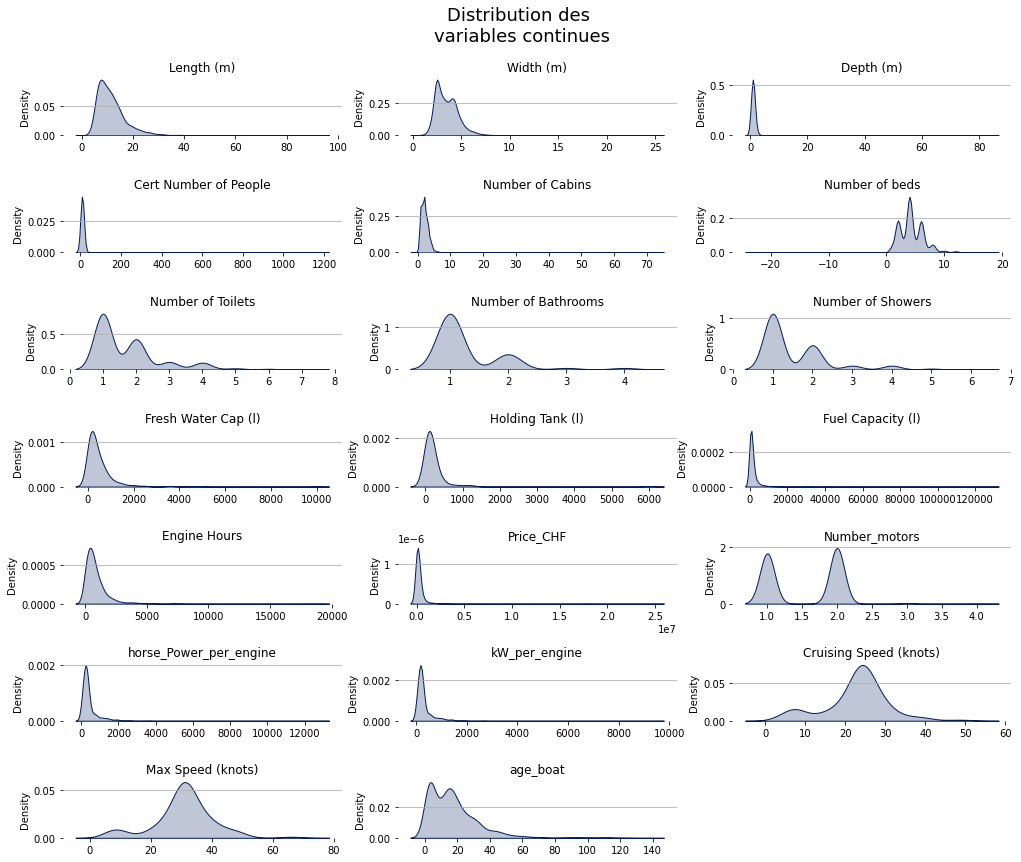

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#011C5D"]
customPalette = sns.set_palette(sns.color_palette(colors))

# On affiche les distributions
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    
del(temp)

In [71]:
train[col_categoricals].describe(include=['O'])

,Model,Type,Location,Equipment,Price,Boat Type,Manufacturer,Boat name,Condition,CE Design Category,Hull Color,Material,Propulsion,Engine,Fuel Type
count,3432,3430,3426,2097,3433,3433,2965,416,1123,249,1136,2855,1100,3151,2666
unique,2887,32,1487,1940,1523,74,604,407,7,4,185,9,7,1831,5
top,BARRACUDA 8,"Used boat,Diesel",Netherlands » In verkoophaven,Battery,"EUR 95.000,-",Motor Yacht,Bénéteau power boats,Maxima,very good,C - Inshore,white white,GRP,Inboard with Shaft,Volvo Penta,Diesel
freq,10,1429,132,17,29,937,229,5,380,123,272,1895,421,128,1593


In [72]:
# On supprime les colonnes que l'on n'exploitera pas (on ajoute Price que nous avons transformer en Price_CHF)
train.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)

# On supprime également les variables de la liste des catégorielle
col_categoricals = [col for col in col_categoricals if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

print(col_categoricals)

['Type', 'Boat Type', 'Manufacturer', 'Condition', 'CE Design Category', 'Material', 'Propulsion', 'Fuel Type']


In [73]:
# On regroupe les modalités de Manufactureur
def group_manufacturer(x):
    # Si le manufactureur est l'un des 4 principaux alors on le consevre
    if x in ['Bénéteau power boats', 'Jeanneau power boats', 'Sunseeker power boats', 'Azimut power boats'] :
        return x
    
    # Sinon on le regroupe 
    else :
        return 'Other'
    
train['Manufacturer'] = train['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)


# On regroupe le Type
def group_type(x):
    
    # On catégorise le bateau : neuf, occasion, exposition
    if 'used' in x.lower() :
        return 'USED_BOAT'
    
    elif 'new' in x.lower() :
        return 'NEW_BOAT'
    
    elif 'display' in x.lower() :
        return 'DISPLAY_BOAT'
    
    # Dans tous les autres cas on remplace par des valeur manquante car pour ces annonces c'est le type du fuel qui s'affiche
    else :
        return np.nan
    
train['Type'] = train['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)


# On regroupe les types de bateaux
def group_boat_type(x):
    
    # Pour les bateaux avec plusieurs types on garde que le dernier, pour les autres cela ne conservse que leur type unique
    boat_type = x.split(',')[-1]
    
    return boat_type

train['Boat Type'] = train['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

# Nous allons juste regrouper les modalités ayant des occurences inferieurs à 20 pour cette variable
nb_values_boat_type = pd.DataFrame(train['Boat Type'].value_counts(dropna=False)).reset_index()

dict_nb_values_boat_type = dict(zip(nb_values_boat_type.iloc[:,0], nb_values_boat_type.iloc[:,1]))

list_values_to_group = [k for k,v in dict_nb_values_boat_type.items() if v > 20]

train['Boat Type'] = train['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

In [74]:
# Pour les variables suivantes, nous regroupons les modalités trop peu fréquentes

# On regroupe les modalités de Condition
def group_condition(x):
    # Si le bateau est en très bon état
    if x in ['very good', 'new', 'as new'] :
        return 'new'
    
    # Si le bateau est en bon état
    if x in ['well-groomed', 'good'] :
        return 'good'
    
    # Sinon on le regroupe 
    else :
        return 'Other'
    
# On regroupe les modalités de Material
def material(x):
    
    if x not in ['GRP', 'Missing', 'PVC', 'Steel', 'Wood', 'Aluminium'] :
        return 'Other'
    
    else :
        return x
    
# On regroupe les modalités de Propulsion
def group_propulsion(x):
    
    if 'drive' in x.lower() :
        return 'Drive'
    
    elif 'inboard' in x.lower() :
        return 'Inboad'
    
    elif 'outboard' in x.lower() :
        return 'Outbord'
    
    else :
        return 'Other'
    
# On regroupe le type de carburant
def group_fuel_type(x):
    
    if x not in ['Diesel', 'Unleaded'] :
        return 'Other'
    
    else :
        return x
    
# Application des traitements   
train['Condition'] = train['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)

train['Material'] = train['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)

train['Propulsion'] = train['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)

train['Fuel Type'] = train['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

In [75]:
train[col_categoricals].describe()

,Type,Boat Type,Manufacturer,Condition,CE Design Category,Material,Propulsion,Fuel Type
count,3404,3433,2965,1123,249,2855,1100,2666
unique,3,18,5,3,4,6,3,3
top,USED_BOAT,Motor Yacht,Other,new,C - Inshore,GRP,Inboad,Diesel
freq,2599,962,2317,835,123,1895,421,1593


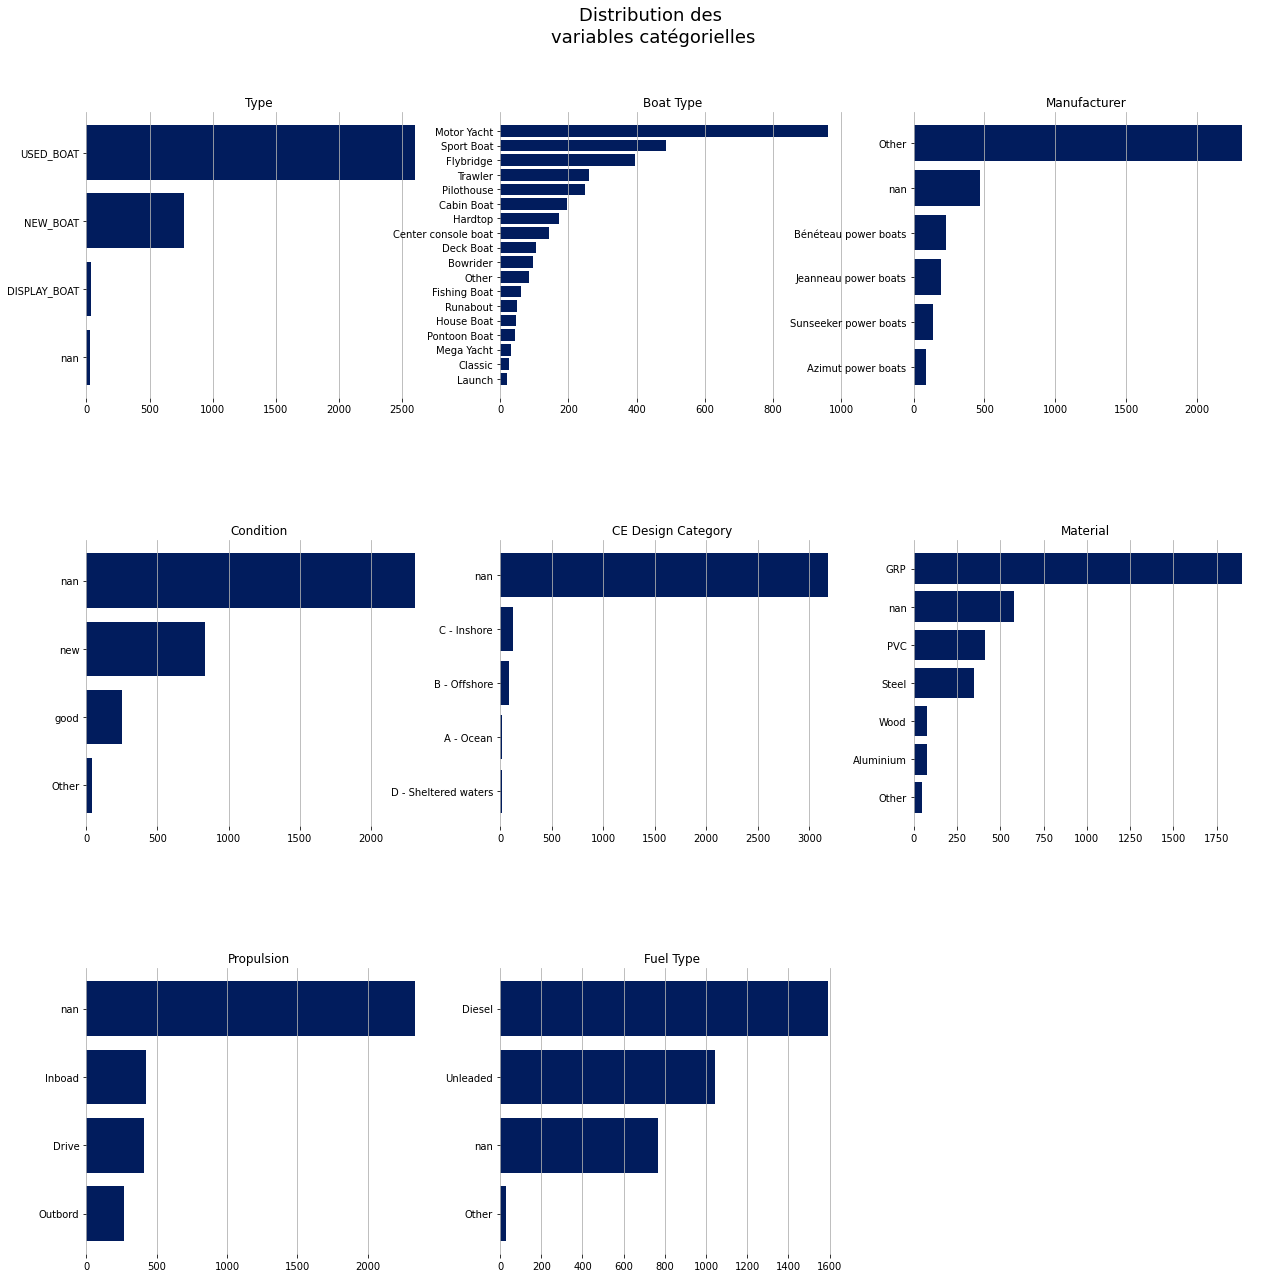

In [76]:
# On peut maintenant regarder la distribution des variables catégorielles
temp=pd.melt(train[col_categoricals].reset_index(), id_vars='index', value_vars=col_categoricals).iloc[:,-2:].astype(str)

ncols = 3
nrows = len(col_categoricals) // ncols + (len(col_categoricals) % ncols > 0)
 
plt.figure(figsize=(21, 21))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution des \nvariables catégorielles", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_categoricals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    temp2=pd.DataFrame(temp[temp['variable']==variable]['value'].value_counts(dropna=False)).reset_index().sort_values(by='value' , ascending=True)
    ax.barh(y= temp2['index'], width= temp2['value'], color='#011C5D')
 
    ax.grid(b=True, which='major', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    
del(temp, temp2)

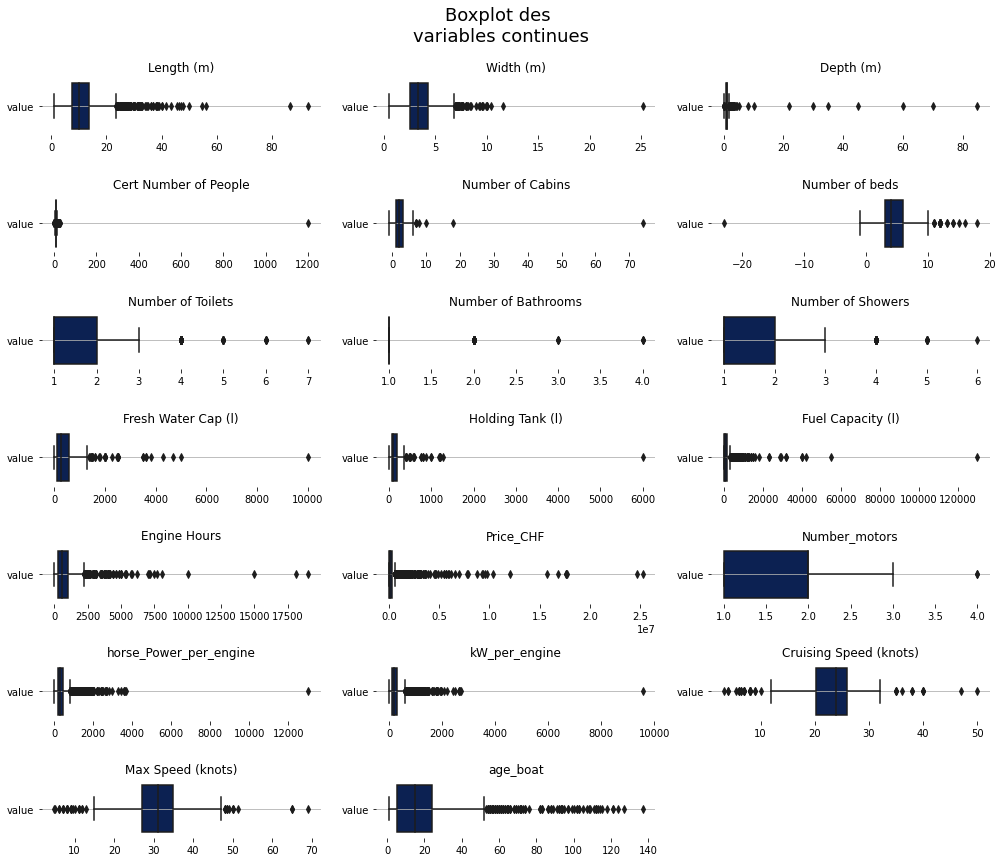

In [77]:
# On affiche les boxplots
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], palette=customPalette, orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


In [78]:
# Let's consider the observation outside 1.5 * the interquartile range are outliers
# Let's consider those features
# Number of Cabins
# Number of Toilets
# Number of Bathrooms
# Number of Showers
# Engine Hours
# Fresh Water Cap (l)
# Holding Tank (l)
# Fuel Capacity (l)
# Ci-dessous une fonction pour tronquer les outliers

import math

def replace_outlier_IQR(df, column, verbose=True, floor=None, ceil=None) :
    
    # 1er Quartile 
    Q1 = np.nanpercentile(df[column], 25)
    
    # 3ème Quartile 
    Q3 = np.nanpercentile(df[column], 75)
    
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # limites, basse & haute
    outer_fence = IQR * 1.5
    
    # On ajoute un plancher - Exemple pour le cas des variables qui ne peuvent être inférieure à 0
    if floor != None :
        outer_lower = floor
    else :
        outer_lower = Q1 - outer_fence
        
    # On ajoute un plafond - Exemple pour le cas des variables qui ne peuvent excéder une certaines valeurs
    if ceil != None :
        outer_upper = ceil
    else :
        outer_upper = Q3 + outer_fence
    
    if verbose :
        print(f"Traitement des outliers - {column} :")
        print(f"... les données < {outer_lower} sont tronquées à {math.ceil(outer_lower)}")
        print(f"... les données > {outer_upper} sont tronquées à {math.floor(outer_upper)}\n")
    
    # Remplace les données inférieur et supérieur à la limite
    series = df[column].apply(lambda x: math.ceil(outer_lower) if x < outer_lower else (math.floor(outer_upper) if x > outer_upper else x))
    
    return series

    # remarque pour ces valeurs on force la valeur minimale acceptable à 0 (sens métier)
for col in ["Number of Cabins", "Number of Toilets", "Number of Bathrooms", "Number of Showers", 
            'Engine Hours', 'Fresh Water Cap (l)', 'Holding Tank (l)', 'Fuel Capacity (l)']:
    
    train[col] = replace_outlier_IQR(train, col, floor=0)

Traitement des outliers - Number of Cabins :
... les données < 0 sont tronquées à 0
... les données > 6.0 sont tronquées à 6

Traitement des outliers - Number of Toilets :
... les données < 0 sont tronquées à 0
... les données > 3.5 sont tronquées à 3

Traitement des outliers - Number of Bathrooms :
... les données < 0 sont tronquées à 0
... les données > 1.0 sont tronquées à 1

Traitement des outliers - Number of Showers :
... les données < 0 sont tronquées à 0
... les données > 3.5 sont tronquées à 3

Traitement des outliers - Engine Hours :
... les données < 0 sont tronquées à 0
... les données > 2205.0 sont tronquées à 2205

Traitement des outliers - Fresh Water Cap (l) :
... les données < 0 sont tronquées à 0
... les données > 1350.0 sont tronquées à 1350

Traitement des outliers - Holding Tank (l) :
... les données < 0 sont tronquées à 0
... les données > 395.0 sont tronquées à 395

Traitement des outliers - Fuel Capacity (l) :
... les données < 0 sont tronquées à 0
... les donné

Remarque : La méthode de l'interquartile, n'est pas appropriée à toutes les variables. Par exemple, si nous l'appliquons sur Cert Number of People, elle nous renvoie que tous les bateaux ayant plus de 15 places sont des outliers mais d'un point de vue métier, ce n'est peut être pas une définition qui nous conviendrait

In [79]:
# Ci-dessous une fonction pour tronquer les outliers sur des valeurs précises
def replace_outlier(df, column, verbose=True, floor=None, ceil=None) :
    
    if verbose :
        print(f"Traitement des outliers - {column} :")
        if floor != None :
            print(f"... les données < {floor} sont tronquées à {floor}")
        if ceil != None :
            print(f"... les données > {ceil} sont tronquées à {ceil}\n")
    
    # Remplace les données inférieur et supérieur à la limite
    if floor != None :
        series = df[column].apply(lambda x: floor if x < floor else x)
    if ceil != None :
        series = df[column].apply(lambda x: ceil if x > ceil else x)
    
    return series

train["Cert Number of People"] = replace_outlier(train, "Cert Number of People", ceil=20)

train["Depth (m)"] = replace_outlier(train, "Depth (m)", ceil=10)
train["Length (m)"] = replace_outlier(train, "Length (m)", ceil=60)
train["Width (m)"] = replace_outlier(train, "Width (m)", ceil=15)

train["horse_Power_per_engine"] = replace_outlier(train, "horse_Power_per_engine", ceil=2000)
train["kW_per_engine"] = replace_outlier(train, "kW_per_engine", ceil=2000)

train["Number_motors"] = replace_outlier(train, "Number_motors", ceil=2)

train["Number of beds"] = replace_outlier(train, "Number of beds", floor=0)

Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont tronquées à 15

Traitement des outliers - horse_Power_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - kW_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - Number_motors :
... les données > 2 sont tronquées à 2

Traitement des outliers - Number of beds :
... les données < 0 sont tronquées à 0


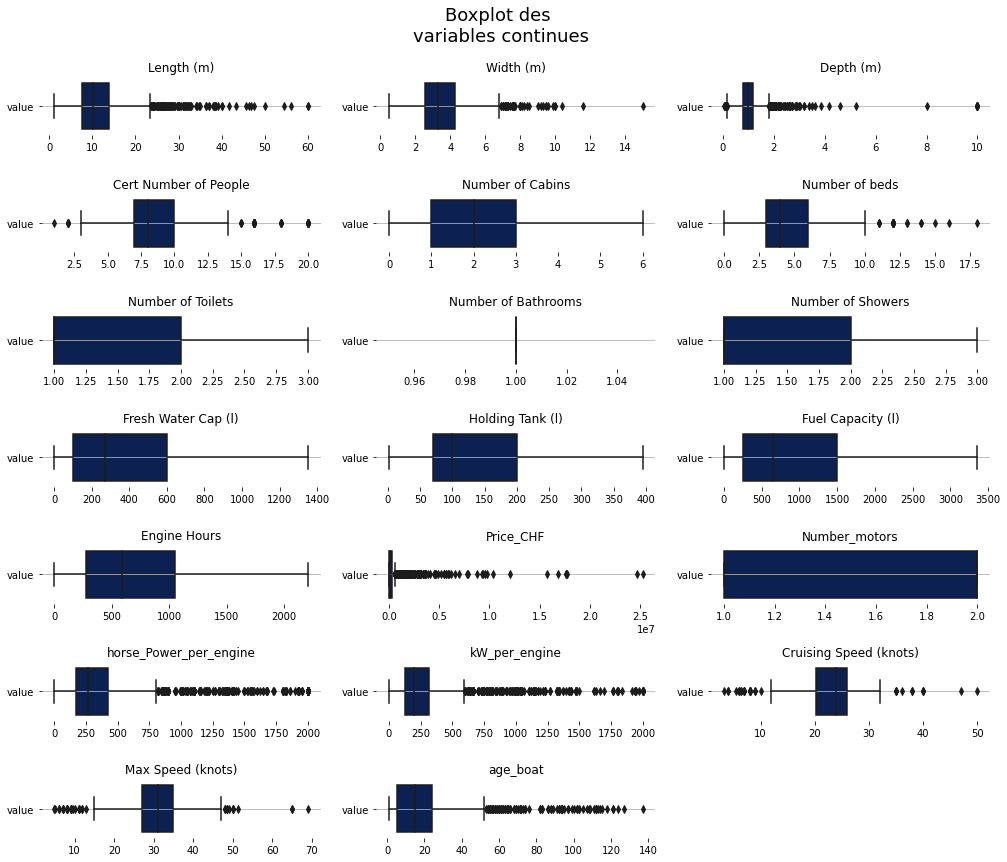

In [80]:
# On affiche les nouvelles distributions
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], palette=customPalette, orient='h')
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [81]:
def display_percentage_missing_values(df):
  col_categoricals = [col for col in df.columns if df[col].dtypes=='O']
  col_numericals = [col for col in df.columns if col not in col_categoricals]

  dict_cols = {'categoricals': col_categoricals,
               'numericals': col_numericals}

  for k, v in dict_cols.items():

    df_temp = pd.DataFrame(np.round(df[v].isna().sum()*100/len(df),2)).reset_index(drop=False)
    df_temp.columns = ['Feature', 'Pct_Na']
    df_temp.sort_values('Pct_Na', ascending=False, inplace=True)

    print(f"% missing values - Feature {k} :")
    for var in df_temp['Feature'].unique():
      pct_nan = df_temp[df_temp['Feature']==var]['Pct_Na'].values[0]

      if pct_nan != 0:
        print(f"... {var} : {pct_nan} %")

      print()

display_percentage_missing_values(train)

% missing values - Feature categoricals :
... CE Design Category : 92.75 %

... Propulsion : 67.96 %

... Condition : 67.29 %

... Fuel Type : 22.34 %

... Material : 16.84 %

... Manufacturer : 13.63 %

... Type : 0.84 %


% missing values - Feature numericals :
... Number of Bathrooms : 95.75 %

... Cruising Speed (knots) : 94.47 %

... Holding Tank (l) : 92.25 %

... Max Speed (knots) : 91.29 %

... Number of Showers : 79.76 %

... Fresh Water Cap (l) : 79.14 %

... Number of Toilets : 77.69 %

... Cert Number of People : 65.28 %

... Engine Hours : 49.55 %

... Number of beds : 37.72 %

... Number of Cabins : 36.15 %

... Fuel Capacity (l) : 33.61 %

... Depth (m) : 28.98 %

... horse_Power_per_engine : 22.58 %

... kW_per_engine : 22.58 %

... Number_motors : 22.58 %

... age_boat : 5.16 %

... Width (m) : 0.61 %

... Length (m) : 0.15 %





In [82]:
# Delete all categorical features having more than 80% of NaN
train.dropna(axis=0,                    # axis = 0 sum on all the lines of a column
             thresh=0.8,                 # threshold where we consider to delete the feature (if axis=1, sum would have been done on the lines)
             subset=col_categoricals,     # we are working only on the features from the list
             inplace=True)

In [83]:
# For the categorical features where we have no idea about the reason of the missing, we impute by the category Missing
# On met à jour la liste
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

for col in col_categoricals :
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par 'missing'")
    train[col] = train[col].fillna('missing')       

Imputation des valeurs manquantes de la colonne 'Type' par 'missing'
Imputation des valeurs manquantes de la colonne 'Boat Type' par 'missing'
Imputation des valeurs manquantes de la colonne 'Manufacturer' par 'missing'
Imputation des valeurs manquantes de la colonne 'Condition' par 'missing'
Imputation des valeurs manquantes de la colonne 'CE Design Category' par 'missing'
Imputation des valeurs manquantes de la colonne 'Material' par 'missing'
Imputation des valeurs manquantes de la colonne 'Propulsion' par 'missing'
Imputation des valeurs manquantes de la colonne 'Fuel Type' par 'missing'


In [84]:
train.reset_index(drop=True,inplace=True)

In [85]:
# For the numerical features, we start to impute the missing values fo some categories by the value they should have
# For example if the Number of bedroom is missing, it means that there is no bedroom
col_to_impute_0 = [col for col in col_numericals if "Number" in col]
col_to_impute_0 = col_to_impute_0 + ["Fresh Water Cap (l)", "Holding Tank (l)"]

print(f"Ci-dessous la liste des colonnes à imputer :\n{col_to_impute_0}\n")

for col in col_to_impute_0:
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par 0")
    train[col] = train[col].fillna(0) 


# For some features we can impute them by using a statistical measure (such as the median)
# Here we will go a bit deeper by using the median of each feature to impute by Boat Type
col_to_impute_median = [col for col in col_numericals if '(m)' in col or '(l)' in col]
col_to_impute_median.remove("Holding Tank (l)")
col_to_impute_median.remove("Fresh Water Cap (l)")

col_to_impute_median = col_to_impute_median + ["kW_per_engine", "horse_Power_per_engine"]

print(f"Ci-dessous la liste des colonnes à imputer :\n{col_to_impute_median}\n")

for col in col_to_impute_median:
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par la médiane par Boat Type")
    train[col] = train.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

# We can impute by an impossible value
for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par -1")
    train[col] = train[col].fillna(-1) 

print("Imputation des valeurs manquantes de la colonne Engine Hours par la médiane par Boat Type")
train["Engine Hours"] = train.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))

Ci-dessous la liste des colonnes à imputer :
['Cert Number of People', 'Number of Cabins', 'Number of beds', 'Number of Toilets', 'Number of Bathrooms', 'Number of Showers', 'Number_motors', 'Fresh Water Cap (l)', 'Holding Tank (l)']

Imputation des valeurs manquantes de la colonne 'Cert Number of People' par 0
Imputation des valeurs manquantes de la colonne 'Number of Cabins' par 0
Imputation des valeurs manquantes de la colonne 'Number of beds' par 0
Imputation des valeurs manquantes de la colonne 'Number of Toilets' par 0
Imputation des valeurs manquantes de la colonne 'Number of Bathrooms' par 0
Imputation des valeurs manquantes de la colonne 'Number of Showers' par 0
Imputation des valeurs manquantes de la colonne 'Number_motors' par 0
Imputation des valeurs manquantes de la colonne 'Fresh Water Cap (l)' par 0
Imputation des valeurs manquantes de la colonne 'Holding Tank (l)' par 0
Ci-dessous la liste des colonnes à imputer :
['Length (m)', 'Width (m)', 'Depth (m)', 'Fuel Capacity

In [86]:
train.isna().sum()

Type                      0
Boat Type                 0
Manufacturer              0
Condition                 0
Length (m)                0
Width (m)                 0
Depth (m)                 0
CE Design Category        0
Cert Number of People     0
Number of Cabins          0
Number of beds            0
Number of Toilets         0
Number of Bathrooms       0
Number of Showers         0
Material                  0
Fresh Water Cap (l)       0
Holding Tank (l)          0
Propulsion                0
Fuel Capacity (l)         0
Fuel Type                 0
Engine Hours              0
Advertisement Date        0
Price_CHF                 0
Number_motors             0
horse_Power_per_engine    0
kW_per_engine             0
Cruising Speed (knots)    0
Max Speed (knots)         0
age_boat                  0
dtype: int64

In [87]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
# On affiche pour rappel, la liste des variables catégorielles
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

print(f"Here is the list to encode :\n{col_categoricals}")

# Il faut identifier les variables 
for col in col_categoricals :
    print(f"Feature {col} has {train[col].nunique()} categories")

Here is the list to encode :
['Type', 'Boat Type', 'Manufacturer', 'Condition', 'CE Design Category', 'Material', 'Propulsion', 'Fuel Type']
Feature Type has 4 categories
Feature Boat Type has 18 categories
Feature Manufacturer has 6 categories
Feature Condition has 4 categories
Feature CE Design Category has 5 categories
Feature Material has 7 categories
Feature Propulsion has 4 categories
Feature Fuel Type has 4 categories


In [88]:
col_categoricals_price = col_categoricals.copy()
col_categoricals_price.append('Price_CHF')


In [89]:
test = test[test['Price'] != 'Price on request']
data_part = test['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
test = new_price.merge(test, left_index=True, right_index=True)

validation["Number_motors"] = validation['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)
test["Number_motors"] = test['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

validation["horse_Power_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)
test["horse_Power_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

validation["kW_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)
test["kW_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    validation[col+' (knots)'] = validation[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    test[col+' (knots)'] = test[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

validation.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)
test.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)

validation['age_boat'] = current_year - validation['Year Built']

validation.drop(columns = ["Year Built"], inplace =True)

test['age_boat'] = current_year - test['Year Built']

test.drop(columns = ["Year Built"], inplace =True)

col_categoricals_val = [col for col in validation.columns if validation[col].dtype=='O']
col_numericals_val = [col for col in validation.columns if col not in col_categoricals+['Advertisement Date']]
col_categoricals_tt = [col for col in test.columns if test[col].dtype=='O']
col_numericals_tt = [col for col in test.columns if col not in col_categoricals+['Advertisement Date']]

validation.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_val = [col for col in col_categoricals_val if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

test.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_tt = [col for col in col_categoricals_tt if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)
test['Manufacturer'] = test['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)

validation['Type'] = validation['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)
test['Type'] = test['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

validation['Condition'] = validation['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
validation['Material'] = validation['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
validation['Propulsion'] = validation['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
validation['Fuel Type'] = validation['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

test['Condition'] = test['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
test['Material'] = test['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
test['Propulsion'] = test['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
test['Fuel Type'] = test['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

validation['Number of Cabins'] = np.where(validation['Number of Cabins'] <0, 0, validation['Number of Cabins'])
validation['Number of Cabins'] = np.where(validation['Number of Cabins'] >6, 6, validation['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] <0, 0, test['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] >6, 6, test['Number of Cabins'])

validation['Number of Toilets'] = np.where(validation['Number of Toilets'] <0, 0, validation['Number of Toilets'])
validation['Number of Toilets'] = np.where(validation['Number of Toilets'] >3.5, 3, validation['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] <0, 0, test['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] >3.5, 3, test['Number of Toilets'])

validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] <0, 0, validation['Number of Bathrooms'])
validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] >1, 1, validation['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] <0, 0, test['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] >1, 1, test['Number of Bathrooms'])

validation['Number of Showers'] = np.where(validation['Number of Showers'] <0, 0, validation['Number of Showers'])
validation['Number of Showers'] = np.where(validation['Number of Showers'] >3.5, 3, validation['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] <0, 0, test['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] >3.5, 3, test['Number of Showers'])

validation['Engine Hours'] = np.where(validation['Engine Hours'] <0, 0, validation['Engine Hours'])
validation['Engine Hours'] = np.where(validation['Engine Hours'] >2205, 2205, validation['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] <0, 0, test['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] >2205, 2205, test['Engine Hours'])

validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] <0, 0, validation['Fresh Water Cap (l)'])
validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] >1350, 1350, validation['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] <0, 0, test['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] >1350, 1350, test['Fresh Water Cap (l)'])

validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] <0, 0, validation['Holding Tank (l)'])
validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] >395, 395, validation['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] <0, 0, test['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] >395, 395, test['Holding Tank (l)'])

validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] <0, 0, validation['Fuel Capacity (l)'])
validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] >3360, 3360, validation['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] <0, 0, test['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] >3360, 3360, test['Fuel Capacity (l)'])

validation["Cert Number of People"] = replace_outlier(validation, "Cert Number of People", ceil=20)

validation["Depth (m)"] = replace_outlier(validation, "Depth (m)", ceil=10)
validation["Length (m)"] = replace_outlier(validation, "Length (m)", ceil=60)
validation["Width (m)"] = replace_outlier(validation, "Width (m)", ceil=15)

validation["horse_Power_per_engine"] = replace_outlier(validation, "horse_Power_per_engine", ceil=2000)
validation["kW_per_engine"] = replace_outlier(validation, "kW_per_engine", ceil=2000)

validation["Number_motors"] = replace_outlier(validation, "Number_motors", ceil=2)

validation["Number of beds"] = replace_outlier(validation, "Number of beds", floor=0)

test["Cert Number of People"] = replace_outlier(test, "Cert Number of People", ceil=20)

test["Depth (m)"] = replace_outlier(test, "Depth (m)", ceil=10)
test["Length (m)"] = replace_outlier(test, "Length (m)", ceil=60)
test["Width (m)"] = replace_outlier(test, "Width (m)", ceil=15)

test["horse_Power_per_engine"] = replace_outlier(test, "horse_Power_per_engine", ceil=2000)
test["kW_per_engine"] = replace_outlier(test, "kW_per_engine", ceil=2000)

test["Number_motors"] = replace_outlier(test, "Number_motors", ceil=2)

test["Number of beds"] = replace_outlier(test, "Number of beds", floor=0)

for col in col_categoricals :
    validation[col] = validation[col].fillna('missing')

for col in col_categoricals :
    test[col] = test[col].fillna('missing')

validation.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# Here it would have been unbiaised to use the values from the train database
# But I didn't have the time to do it; I will update in the future

for col in col_to_impute_0:
    validation[col] = validation[col].fillna(0) 

for col in col_to_impute_0:
    test[col] = test[col].fillna(0) 

for col in col_to_impute_median:
    validation[col] = validation.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in col_to_impute_median:
    test[col] = test.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    validation[col] = validation[col].fillna(-1)

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    test[col] = test[col].fillna(-1) 

validation["Engine Hours"] = validation.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))
test["Engine Hours"] = test.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont tronquées à 15

Traitement des outliers - horse_Power_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - kW_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - Number_motors :
... les données > 2 sont tronquées à 2

Traitement des outliers - Number of beds :
... les données < 0 sont tronquées à 0
Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont t

Let's imagine that you have a boat that you want to sell.

You estimate that based on his characteristics, you could sell it for 175.000 CHF so let's estimate the chance to sell it at this price.

In [90]:
# Let's create a copy that we will use for some data visualization
train_viz = train[col_categoricals_price].copy()
val_viz = validation[col_categoricals_price].copy()
test_viz = test[col_categoricals_price].copy()

In [91]:
train_viz['More_175000CHF'] = np.where(train_viz['Price_CHF']>175000, 1, 0)
val_viz['More_175000CHF'] = np.where(val_viz['Price_CHF']>175000, 1, 0)
test_viz['More_175000CHF'] = np.where(test_viz['Price_CHF']>175000, 1, 0)

In [92]:
train_viz.head()

,Type,Boat Type,Manufacturer,Condition,CE Design Category,Material,Propulsion,Fuel Type,Price_CHF,More_175000CHF
0,NEW_BOAT,Hardtop,Other,new,missing,GRP,Drive,Diesel,290010.0,1
1,USED_BOAT,Other,Other,good,missing,GRP,Drive,Diesel,93450.0,0
2,USED_BOAT,Motor Yacht,Other,new,missing,GRP,Inboad,Diesel,939750.0,1
3,USED_BOAT,Motor Yacht,Other,new,missing,GRP,missing,Unleaded,32445.0,0
4,USED_BOAT,Runabout,Other,missing,missing,GRP,missing,missing,304500.0,1


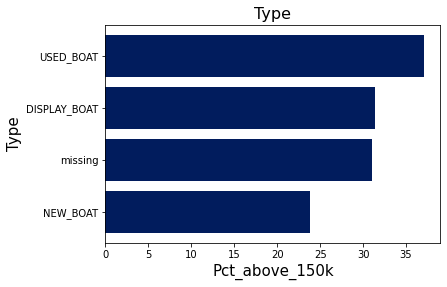

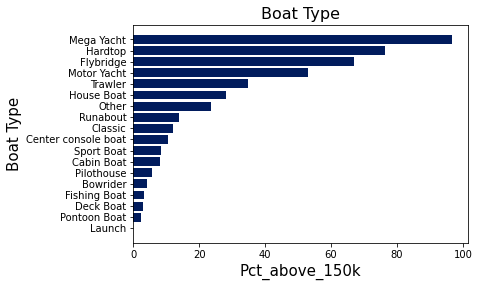

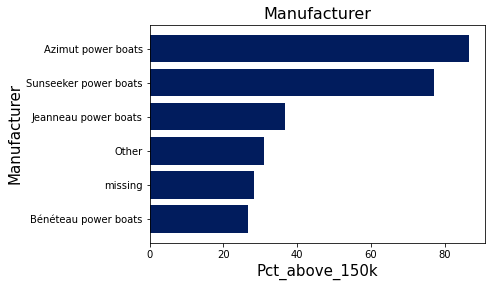

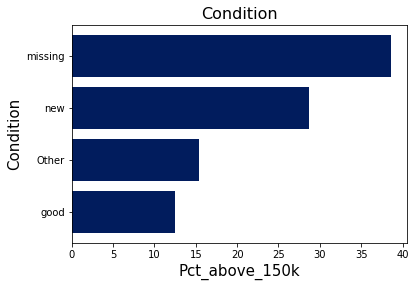

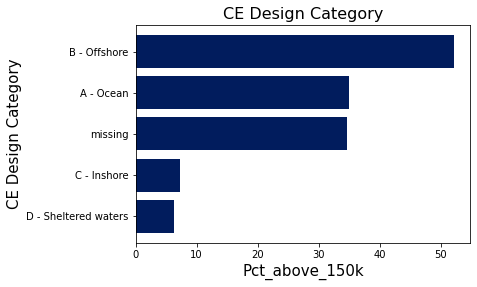

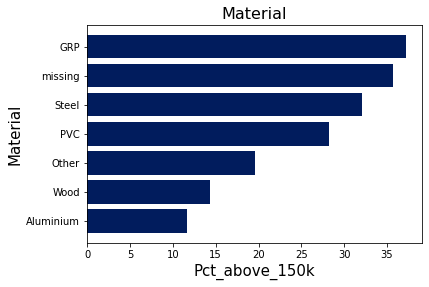

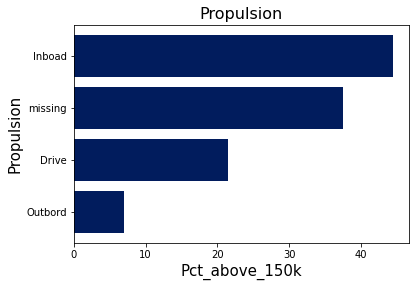

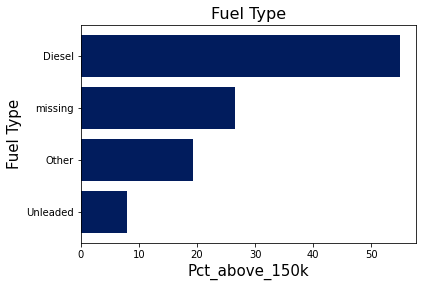

In [93]:
for i in col_categoricals:
  temp = np.round(train_viz.groupby(i)['More_175000CHF'].mean()*100,2)
  temp = pd.Series(temp, name='Pct_above_150k').reset_index().sort_values(by='Pct_above_150k')
  fig1, ax = plt.subplots()
  ax.barh(y=temp[i], width = temp['Pct_above_150k'])
  ax.set_title(i, loc= 'center', fontsize=16) # loc représente la localisation du titre sur le plot
  ax.set_ylabel(i, fontsize=15) # fontsize représente la taille du titre
  ax.set_xlabel('Pct_above_150k', fontsize=15)
  plt.show()

We can group some categories together because they have the same percentage of target -> they have a similar information

In [94]:
# We can delete CE Design Category because not enough values in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

train_viz['Material'] = train_viz['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

train_viz['Manufacturer'] = train_viz['Manufacturer'].apply(lambda x: manufacture_grouping(x))

train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Mega Yacht', 'More_80pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Hardtop', 'More_80pct' , train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Flybridge', 'More_50pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Motor Yacht', 'More_50pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Trawler', 'More_20pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'House Boat', 'More_20pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Other', 'More_20pct', train_viz['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

train_viz['Boat Type'] = train_viz['Boat Type'].apply(lambda x: boattype_grouping(x))

train_viz['Type'] = np.where(train_viz['Type']== 'DISPLAY_BOAT', 'display_missing',train_viz['Type'])
train_viz['Type'] = np.where(train_viz['Type']== 'missing', 'display_missing', train_viz['Type'])


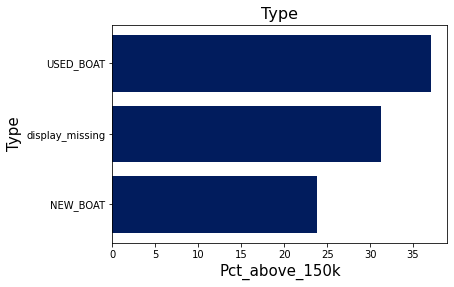

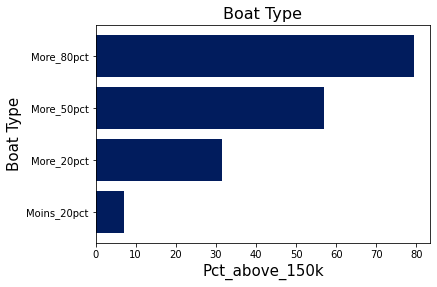

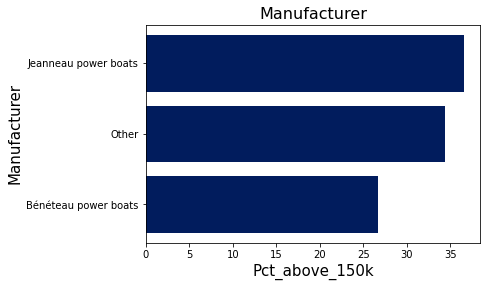

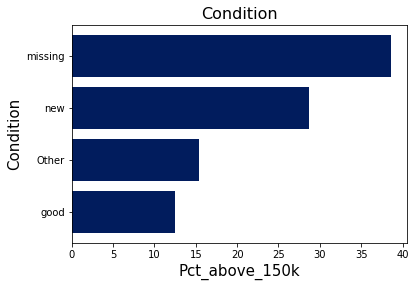

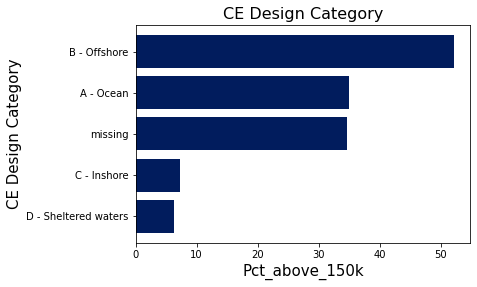

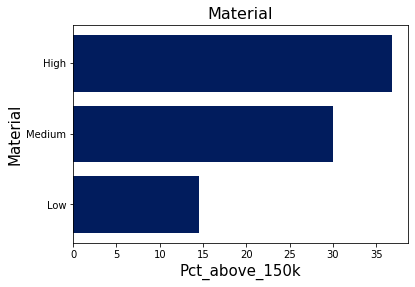

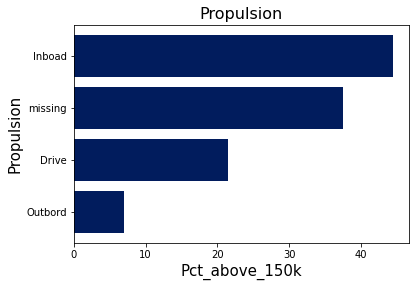

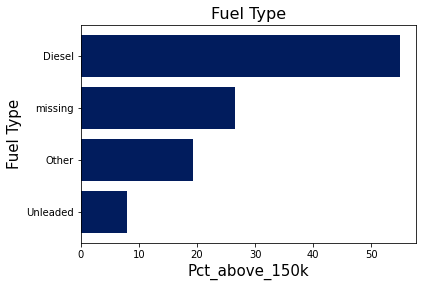

In [95]:
for i in col_categoricals:
  temp = np.round(train_viz.groupby(i)['More_175000CHF'].mean()*100,2)
  temp = pd.Series(temp, name='Pct_above_150k').reset_index().sort_values(by='Pct_above_150k')
  fig1, ax = plt.subplots()
  ax.barh(y=temp[i], width = temp['Pct_above_150k'])
  ax.set_title(i, loc= 'center', fontsize=16) # loc représente la localisation du titre sur le plot
  ax.set_ylabel(i, fontsize=15) # fontsize représente la taille du titre
  ax.set_xlabel('Pct_above_150k', fontsize=15)
  plt.show()

In [96]:
# We can delete CE Design Category because not enough values in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

train['Material'] = train['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

train['Manufacturer'] = train['Manufacturer'].apply(lambda x: manufacture_grouping(x))

train['Boat Type'] = np.where(train['Boat Type'] == 'Mega Yacht', 'More_80pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Hardtop', 'More_80pct' , train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Flybridge', 'More_50pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Motor Yacht', 'More_50pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Trawler', 'More_20pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'House Boat', 'More_20pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Other', 'More_20pct', train['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

train['Boat Type'] = train['Boat Type'].apply(lambda x: boattype_grouping(x))

train['Type'] = np.where(train['Type']== 'DISPLAY_BOAT', 'display_missing',train['Type'])
train['Type'] = np.where(train['Type']== 'missing', 'display_missing', train['Type'])


# We can delete CE Design Category because not enough validationues in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

validation['Material'] = validation['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: manufacture_grouping(x))

validation['Boat Type'] = np.where(validation['Boat Type'] == 'Mega Yacht', 'More_80pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Hardtop', 'More_80pct' , validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Flybridge', 'More_50pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Motor Yacht', 'More_50pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Trawler', 'More_20pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'House Boat', 'More_20pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Other', 'More_20pct', validation['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: boattype_grouping(x))

validation['Type'] = np.where(validation['Type']== 'DISPLAY_BOAT', 'display_missing',validation['Type'])
validation['Type'] = np.where(validation['Type']== 'missing', 'display_missing', validation['Type'])


# We can delete CE Design Category because not enough testues in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

test['Material'] = test['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

test['Manufacturer'] = test['Manufacturer'].apply(lambda x: manufacture_grouping(x))

test['Boat Type'] = np.where(test['Boat Type'] == 'Mega Yacht', 'More_80pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Hardtop', 'More_80pct' , test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Flybridge', 'More_50pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Motor Yacht', 'More_50pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Trawler', 'More_20pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'House Boat', 'More_20pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Other', 'More_20pct', test['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

test['Boat Type'] = test['Boat Type'].apply(lambda x: boattype_grouping(x))

test['Type'] = np.where(test['Type']== 'DISPLAY_BOAT', 'display_missing',test['Type'])
test['Type'] = np.where(test['Type']== 'missing', 'display_missing', test['Type'])

In [97]:
cols_before_encod = train.columns
validation = validation[cols_before_encod]
test = test[cols_before_encod]

In [98]:
train.drop(columns = ['CE Design Category'], inplace=True)
validation.drop(columns=['CE Design Category'], inplace=True)
test.drop(columns=['CE Design Category'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

In [100]:
# On identifie les colonnes déjà en numérique, pour regrouper les données ensemble après
col_numericals = [col for col in train.columns if col not in col_categoricals]

enc = OneHotEncoder(handle_unknown='ignore') # On définie le One Hot Encoder, différentes options sont possibles comme retirer une modalité 
                                             # pour chaque variable catégorielle avant d'éviter les problèmes de multicollinéarité 
                                             # (ex : pour régression linéaire)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.fit_transform(train[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
train = train[col_numericals].join(enc_df)

# Vous constatez que les variables sont encodées mais qu'il est difficile de savoir quelle est la feature originel
train.head()

,Length (m),Width (m),Depth (m),Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers,Fresh Water Cap (l),Holding Tank (l),Fuel Capacity (l),Engine Hours,Advertisement Date,Price_CHF,Number_motors,horse_Power_per_engine,kW_per_engine,Cruising Speed (knots),Max Speed (knots),age_boat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,10.03,3.23,0.70,8.0,0.0,6.0,0.0,0.0,0.0,120.0,0.0,490.0,6.0,2020-07-07,290010.0,2.0,220.0,162.0,-1.0,-1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13.00,3.00,1.25,0.0,2.0,4.0,1.0,0.0,1.0,40.0,0.0,900.0,380.0,2020-06-08,93450.0,2.0,330.0,243.0,-1.0,-1.0,32.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28.27,6.60,1.80,7.0,3.0,0.0,3.0,0.0,3.0,1350.0,395.0,3360.0,2205.0,2020-03-29,939750.0,2.0,2000.0,1471.0,35.0,27.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.00,3.50,1.00,0.0,1.0,2.0,0.0,0.0,1.0,200.0,50.0,700.0,1300.0,2020-02-28,32445.0,2.0,255.0,188.0,-1.0,-1.0,43.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,15.95,5.00,1.40,0.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,2000.0,1000.0,2020-08-23,304500.0,2.0,360.0,265.0,-1.0,-1.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [101]:
# vous pouvez accéder aux noms de vos nouvelles features avec une méthode dédié de votre encodeur
encname = enc.get_feature_names().tolist()

# x0 = votre première variable donc 'Tpye', et ainsi de suite
print(f"Ci-dessous, la liste des features : \n{encname}")

Ci-dessous, la liste des features : 
['x0_NEW_BOAT', 'x0_USED_BOAT', 'x0_display_missing', 'x1_Moins_20pct', 'x1_More_20pct', 'x1_More_50pct', 'x1_More_80pct', 'x2_Bénéteau power boats', 'x2_Jeanneau power boats', 'x2_Other', 'x3_Other', 'x3_good', 'x3_missing', 'x3_new', 'x4_High', 'x4_Low', 'x4_Medium', 'x5_Drive', 'x5_Inboad', 'x5_Outbord', 'x5_missing', 'x6_Diesel', 'x6_Other', 'x6_Unleaded', 'x6_missing']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
# On affecte les noms stockés par l'encodeur
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
train.rename(columns=dict_int_to_encname, inplace=True)

train.head()

,Length (m),Width (m),Depth (m),Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers,Fresh Water Cap (l),Holding Tank (l),Fuel Capacity (l),Engine Hours,Advertisement Date,Price_CHF,Number_motors,horse_Power_per_engine,kW_per_engine,Cruising Speed (knots),Max Speed (knots),age_boat,x0_NEW_BOAT,x0_USED_BOAT,x0_display_missing,x1_Moins_20pct,x1_More_20pct,x1_More_50pct,x1_More_80pct,x2_Bénéteau power boats,x2_Jeanneau power boats,x2_Other,x3_Other,x3_good,x3_missing,x3_new,x4_High,x4_Low,x4_Medium,x5_Drive,x5_Inboad,x5_Outbord,x5_missing,x6_Diesel,x6_Other,x6_Unleaded,x6_missing
0,10.03,3.23,0.70,8.0,0.0,6.0,0.0,0.0,0.0,120.0,0.0,490.0,6.0,2020-07-07,290010.0,2.0,220.0,162.0,-1.0,-1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13.00,3.00,1.25,0.0,2.0,4.0,1.0,0.0,1.0,40.0,0.0,900.0,380.0,2020-06-08,93450.0,2.0,330.0,243.0,-1.0,-1.0,32.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28.27,6.60,1.80,7.0,3.0,0.0,3.0,0.0,3.0,1350.0,395.0,3360.0,2205.0,2020-03-29,939750.0,2.0,2000.0,1471.0,35.0,27.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.00,3.50,1.00,0.0,1.0,2.0,0.0,0.0,1.0,200.0,50.0,700.0,1300.0,2020-02-28,32445.0,2.0,255.0,188.0,-1.0,-1.0,43.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,15.95,5.00,1.40,0.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,2000.0,1000.0,2020-08-23,304500.0,2.0,360.0,265.0,-1.0,-1.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [103]:
# On remet les noms des variables originelles
dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

print(dict_encname_to_colname)

for k,v in dict_encname_to_colname.items():
    
    for col in train.columns[train.columns.str.startswith(k)]:
        train.rename(columns={col : v+col[2:]}, inplace=True)
        
train.head()

{'x0': 'Type', 'x1': 'Boat Type', 'x2': 'Manufacturer', 'x3': 'Condition', 'x4': 'Material', 'x5': 'Propulsion', 'x6': 'Fuel Type'}


,Length (m),Width (m),Depth (m),Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers,Fresh Water Cap (l),Holding Tank (l),Fuel Capacity (l),Engine Hours,Advertisement Date,Price_CHF,Number_motors,horse_Power_per_engine,kW_per_engine,Cruising Speed (knots),Max Speed (knots),age_boat,Type_NEW_BOAT,Type_USED_BOAT,Type_display_missing,Boat Type_Moins_20pct,Boat Type_More_20pct,Boat Type_More_50pct,Boat Type_More_80pct,Manufacturer_Bénéteau power boats,Manufacturer_Jeanneau power boats,Manufacturer_Other,Condition_Other,Condition_good,Condition_missing,Condition_new,Material_High,Material_Low,Material_Medium,Propulsion_Drive,Propulsion_Inboad,Propulsion_Outbord,Propulsion_missing,Fuel Type_Diesel,Fuel Type_Other,Fuel Type_Unleaded,Fuel Type_missing
0,10.03,3.23,0.70,8.0,0.0,6.0,0.0,0.0,0.0,120.0,0.0,490.0,6.0,2020-07-07,290010.0,2.0,220.0,162.0,-1.0,-1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13.00,3.00,1.25,0.0,2.0,4.0,1.0,0.0,1.0,40.0,0.0,900.0,380.0,2020-06-08,93450.0,2.0,330.0,243.0,-1.0,-1.0,32.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28.27,6.60,1.80,7.0,3.0,0.0,3.0,0.0,3.0,1350.0,395.0,3360.0,2205.0,2020-03-29,939750.0,2.0,2000.0,1471.0,35.0,27.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.00,3.50,1.00,0.0,1.0,2.0,0.0,0.0,1.0,200.0,50.0,700.0,1300.0,2020-02-28,32445.0,2.0,255.0,188.0,-1.0,-1.0,43.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,15.95,5.00,1.40,0.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,2000.0,1000.0,2020-08-23,304500.0,2.0,360.0,265.0,-1.0,-1.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [104]:
train['total_HP'] = train['Number_motors']*train['horse_Power_per_engine']
train['total_kW'] = train['Number_motors']*train['kW_per_engine']

In [105]:
# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(validation[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
validation = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
validation.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in validation.columns[validation.columns.str.startswith(k)]:
        validation.rename(columns={col : v+col[2:]}, inplace=True)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(test[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
test = test[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
test.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in test.columns[test.columns.str.startswith(k)]:
        test.rename(columns={col : v+col[2:]}, inplace=True)

validation['total_HP'] = validation['Number_motors']*validation['horse_Power_per_engine']
validation['total_kW'] = validation['Number_motors']*validation['kW_per_engine']

test['total_HP'] = test['Number_motors']*test['horse_Power_per_engine']
test['total_kW'] = test['Number_motors']*test['kW_per_engine']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
cols_enc = train.columns
validation = validation[cols_enc]
test = test[cols_enc]

In [107]:
'''train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)
validation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)
test['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)
train.drop(columns = ['Price_CHF'], inplace=True)
validation.drop(columns=['Price_CHF'], inplace=True)
test.drop(columns=['Price_CHF'], inplace=True)'''

"train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)\nvalidation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)\ntest['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)\ntrain.drop(columns = ['Price_CHF'], inplace=True)\nvalidation.drop(columns=['Price_CHF'], inplace=True)\ntest.drop(columns=['Price_CHF'], inplace=True)"

In [108]:
len(test)

5396

In [109]:
'''test = test[test['Price'] != 'Price on request']
data_part = test['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
test = new_price.merge(test, left_index=True, right_index=True)

validation["Number_motors"] = validation['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)
test["Number_motors"] = test['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

validation["horse_Power_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)
test["horse_Power_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

validation["kW_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)
test["kW_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    validation[col+' (knots)'] = validation[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    test[col+' (knots)'] = test[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

validation.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)
test.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)

validation['age_boat'] = current_year - validation['Year Built']

validation.drop(columns = ["Year Built"], inplace =True)

test['age_boat'] = current_year - test['Year Built']

test.drop(columns = ["Year Built"], inplace =True)

col_categoricals_val = [col for col in validation.columns if validation[col].dtype=='O']
col_numericals_val = [col for col in validation.columns if col not in col_categoricals+['Advertisement Date']]
col_categoricals_tt = [col for col in test.columns if test[col].dtype=='O']
col_numericals_tt = [col for col in test.columns if col not in col_categoricals+['Advertisement Date']]

validation.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_val = [col for col in col_categoricals_val if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

test.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_tt = [col for col in col_categoricals_tt if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)
test['Manufacturer'] = test['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)

validation['Type'] = validation['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)
test['Type'] = test['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

validation['Condition'] = validation['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
validation['Material'] = validation['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
validation['Propulsion'] = validation['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
validation['Fuel Type'] = validation['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

test['Condition'] = test['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
test['Material'] = test['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
test['Propulsion'] = test['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
test['Fuel Type'] = test['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

validation['Number of Cabins'] = np.where(validation['Number of Cabins'] <0, 0, validation['Number of Cabins'])
validation['Number of Cabins'] = np.where(validation['Number of Cabins'] >6, 6, validation['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] <0, 0, test['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] >6, 6, test['Number of Cabins'])

validation['Number of Toilets'] = np.where(validation['Number of Toilets'] <0, 0, validation['Number of Toilets'])
validation['Number of Toilets'] = np.where(validation['Number of Toilets'] >3.5, 3, validation['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] <0, 0, test['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] >3.5, 3, test['Number of Toilets'])

validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] <0, 0, validation['Number of Bathrooms'])
validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] >1, 1, validation['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] <0, 0, test['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] >1, 1, test['Number of Bathrooms'])

validation['Number of Showers'] = np.where(validation['Number of Showers'] <0, 0, validation['Number of Showers'])
validation['Number of Showers'] = np.where(validation['Number of Showers'] >3.5, 3, validation['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] <0, 0, test['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] >3.5, 3, test['Number of Showers'])

validation['Engine Hours'] = np.where(validation['Engine Hours'] <0, 0, validation['Engine Hours'])
validation['Engine Hours'] = np.where(validation['Engine Hours'] >2205, 2205, validation['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] <0, 0, test['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] >2205, 2205, test['Engine Hours'])

validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] <0, 0, validation['Fresh Water Cap (l)'])
validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] >1350, 1350, validation['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] <0, 0, test['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] >1350, 1350, test['Fresh Water Cap (l)'])

validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] <0, 0, validation['Holding Tank (l)'])
validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] >395, 395, validation['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] <0, 0, test['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] >395, 395, test['Holding Tank (l)'])

validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] <0, 0, validation['Fuel Capacity (l)'])
validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] >3360, 3360, validation['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] <0, 0, test['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] >3360, 3360, test['Fuel Capacity (l)'])

validation["Cert Number of People"] = replace_outlier(validation, "Cert Number of People", ceil=20)

validation["Depth (m)"] = replace_outlier(validation, "Depth (m)", ceil=10)
validation["Length (m)"] = replace_outlier(validation, "Length (m)", ceil=60)
validation["Width (m)"] = replace_outlier(validation, "Width (m)", ceil=15)

validation["horse_Power_per_engine"] = replace_outlier(validation, "horse_Power_per_engine", ceil=2000)
validation["kW_per_engine"] = replace_outlier(validation, "kW_per_engine", ceil=2000)

validation["Number_motors"] = replace_outlier(validation, "Number_motors", ceil=2)

validation["Number of beds"] = replace_outlier(validation, "Number of beds", floor=0)

test["Cert Number of People"] = replace_outlier(test, "Cert Number of People", ceil=20)

test["Depth (m)"] = replace_outlier(test, "Depth (m)", ceil=10)
test["Length (m)"] = replace_outlier(test, "Length (m)", ceil=60)
test["Width (m)"] = replace_outlier(test, "Width (m)", ceil=15)

test["horse_Power_per_engine"] = replace_outlier(test, "horse_Power_per_engine", ceil=2000)
test["kW_per_engine"] = replace_outlier(test, "kW_per_engine", ceil=2000)

test["Number_motors"] = replace_outlier(test, "Number_motors", ceil=2)

test["Number of beds"] = replace_outlier(test, "Number of beds", floor=0)

for col in col_categoricals :
    validation[col] = validation[col].fillna('missing')

for col in col_categoricals :
    test[col] = test[col].fillna('missing')

validation.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# Here it would have been unbiaised to use the values from the train database
# But I didn't have the time to do it; I will update in the future

for col in col_to_impute_0:
    validation[col] = validation[col].fillna(0) 

for col in col_to_impute_0:
    test[col] = test[col].fillna(0) 

for col in col_to_impute_median:
    validation[col] = validation.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in col_to_impute_median:
    test[col] = test.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    validation[col] = validation[col].fillna(-1)

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    test[col] = test[col].fillna(-1) 

validation["Engine Hours"] = validation.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))
test["Engine Hours"] = test.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))



#############
#############
#############


# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(validation[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
validation = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
validation.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in validation.columns[validation.columns.str.startswith(k)]:
        validation.rename(columns={col : v+col[2:]}, inplace=True)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(test[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
test = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
test.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in test.columns[test.columns.str.startswith(k)]:
        test.rename(columns={col : v+col[2:]}, inplace=True)

validation['total_HP'] = validation['Number_motors']*validation['horse_Power_per_engine']
validation['total_kW'] = validation['Number_motors']*validation['kW_per_engine']

test['total_HP'] = test['Number_motors']*test['horse_Power_per_engine']
test['total_kW'] = test['Number_motors']*test['kW_per_engine']'''

'test = test[test[\'Price\'] != \'Price on request\']\ndata_part = test[\'Price\'].str.partition(\' \')\ndata_part[0] = data_part[0].str.replace(\'£\', \'GBP\')\ndata_part[2] = data_part[2].str.replace(\'.\', \'\')\ndata_part[2] = data_part[2].str.replace(\',-\', \'\')\ndata_part[2] = data_part[2].astype(float, errors=\'raise\')\n\n# Price conversion\nnew_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)\n\nnew_price = pd.DataFrame(new_price, columns=[\'Price_CHF\'])\ntest = new_price.merge(test, left_index=True, right_index=True)\n\nvalidation["Number_motors"] = validation[\'Engine Performance\'].apply(lambda x : find_nb_motors(x) if str(x) != \'nan\' else x)\ntest["Number_motors"] = test[\'Engine Performance\'].apply(lambda x : find_nb_motors(x) if str(x) != \'nan\' else x)\n\nvalidation["horse_Power_per_engine"] = validation[\'Engine Performance\'].apply(lambda x : find_between(x, \'x\', \'HP\') if str(x) != \'nan\' else x)\ntest["horse_Power_per_engine"] = test[\'

Now, we can moove to the ML part !

# Linear Regression Model

In [110]:
import sklearn 
from sklearn.linear_model import LinearRegression

In [114]:
X_features = train.columns.to_list()
X_features.remove('Advertisement Date')
X_features.remove('Material_Low')
X_features.remove('kW_per_engine')
X_features.remove('Price_CHF')
X_features.remove('Fresh Water Cap (l)')
X_features.remove('Holding Tank (l)')
X_features.remove('Fuel Capacity (l)')
X_features.remove('Engine Hours')
X_features.remove('Max Speed (knots)')
X_features.remove('horse_Power_per_engine')
X_features.remove('total_HP')
X_features.remove('total_kW')

Y_feature = 'Price_CHF'

In [115]:
X_features = train.columns.to_list()

In [113]:
X_train = train[X_features]
X_test = test[X_features]
Y_train = train[Y_feature]
Y_test = test[Y_feature]

KeyError: ignored

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
y_pred = model.predict(X_test)
act_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
act_pred.head()

In [ ]:
df1 = act_pred.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
Y_test.shape

In [ ]:
#plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
from sklearn import metrics
%matplotlib inline
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("Test  R^2 Score : ", lin_reg.score(X_test, Y_test))

In [ ]:
X_train = train[X_features]
X_test = test[X_features]
Y_train = train[Y_feature]
Y_test = test[Y_feature]

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# a simple linear model
import sklearn

lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_train, Y_train)

***Examining the model coefficients***

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [ ]:
print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", lin_reg.coef_[i].round(2))

While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features. If for example we were to measure the age of a home in minutes instead of years, then the coefficients for the HouseAge feature would become 0.0115 / (365∗24∗60) = 2.18e-8. Clearly the number of years since a house was built is not more important than the number of minutes, yet its coefficient value is much larger. This means that the magnitude of a coefficient is not necessarily a good measure of a feature’s importance in a linear model.

In [ ]:
print("Test  R^2 Score : ", lin_reg.score(X_test, Y_test))
print("Train R^2 Score : ", lin_reg.score(X_train, Y_train))

In [ ]:
print(np.mean(Y_train))
print(np.median(Y_train))
print(max(Y_train))
print(min(Y_train))

In [ ]:
print(max(Y_test))
print(min(Y_test))

In [ ]:
#!pip install shap
import shap
shap.initjs()

In [ ]:
lin_reg_explainer1 = shap.LinearExplainer(lin_reg, X_train)

In [ ]:
shap_vals = lin_reg_explainer1.shap_values(X_test)

In [ ]:
masker = shap.maskers.Independent(data = X_test)

explainer = shap.LinearExplainer(lin_reg, masker=masker, feature_names=X_features)
shap_values = explainer(X_test)

In [ ]:
sample_idx = 100

shap_vals = lin_reg_explainer1.shap_values(X_test)[sample_idx]

print('Actual Value: ', Y_test[sample_idx])

print("Expected/Base Value : ", lin_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model : ", lin_reg.predict(X_test)[sample_idx])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())

In [ ]:
lin_reg_explainer2 = shap.LinearExplainer(lin_reg, X_train, feature_perturbation="correlation_dependent")
sample_idx = 100

shap_vals = lin_reg_explainer2.shap_values(X_test)[sample_idx]
print('Actual Value: ', Y_test[sample_idx])

print("Base Value : ", lin_reg_explainer2.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model : ", lin_reg.predict(X_test)[sample_idx])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())

In [ ]:
masker = shap.maskers.Impute(data = X_test)

explainer = shap.LinearExplainer(lin_reg, masker=masker, feature_names=X_features)
shap_values = explainer(X_test)

**Local interpretability: explaining individual predictions**
Explaining predictions for individual instances of the data is referred to as local interpretability. SHAP explains how individual predictions are arrived at in terms of contributions from each of the model's input variables. This is a highly intuitive approach that produces simple but informative outputs.

Waterfal

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[110], max_display=14)

**Force plots**
Whereas waterfall plots are expansive and spare no detail when explaining a prediction, force plots are equivalent representations that display the key information in a more condensed format 

The force plot shows shap values contributions in generating final prediction using an additive force layout. It shows which features contributed to how much positively or negatively to base value to generate a prediction.

We can generate force plot using force_plot() method. Below are list of important parameters for force_plot() method.

expected_value - It accepts base value on which shap values will be added. The explainer object has a property named expected_value which needs to be passed to this parameter.
shap_values - It accepts an array of shap values for an individual sample of data.
feature_names - It accepts a list of feature names.
out_names - It accepts string specifying target variable name.
Below we have generated a force plot of the first test sample using the first linear explainer. We can see the magnitude of positivity and negativity of features in the chart.

In [ ]:
# visualize the first prediction's explanation

shap.initjs()
shap.force_plot(shap_values[-2],
               # X_test.iloc[10,:])
                out_names="Price")  



In [ ]:
shap_values[-2]

**Global interpretability: understanding drivers of predictions across the population**
The goal of global interpretation methods is to describe the expected behaviour of a machine learning model with respect to the whole distribution of values for its input variables. With SHAP, this is achieved by aggregating the SHAP values for individual instances across the entire population.

**Bar plots**
The simplest starting point for global interpretation with SHAP is to examine the mean absolute SHAP value for each feature across all of the data. This quantifies, on average, the magnitude (positive or negative) of each feature's contribution towards the predicted house prices. Features with higher mean absolute SHAP values are more influential. Mean absolute SHAP values are essentially a drop-in replacement for more traditional feature importance measures but have two key advantages:

Mean absolute SHAP values are more theoretically rigorous, and relate to which features impact predictions most (which is usually what we're interested in). Conventional feature importances are measured in more abstract and algorithm-specific ways, and are determined by how much each feature improves the model's predictive performance.
Mean absolute SHAP values have intuitive units - for this example, they are quantified in dollars, like the target variable. Feature importances are often expressed in counterintuitive units based on complex concepts such as tree algorithm node impurities.

Mean absolute SHAP values are typically displayed as bar plots that rank features by their importance, as shown in Figure 7. The key characteristics to examine are the ordering of features and the relative magnitudes of the mean absolute SHAP values. Here we see that % working class is the most influential variable, contributing on average ±$3,821 to each predicted house price. By contrast, the least informative variable, Charles River, contributes only ±$13 - not surprising considering it has the same value of 0 for 93% of the dataset (see Figure 3).

In [ ]:
shap.plots.bar(shap_values, max_display=20)

In [ ]:
shap.plots.bar(shap_values[-3], max_display=15)

**Beeswarm plots**
SHAP feature importance bar plots are a superior approach to traditional alternatives but in isolation, they provide little additional value beyond their more rigorous theoretical underpinnings. Beeswarm plots are a more complex and information-rich display of SHAP values that reveal not just the relative importance of features, but their actual relationships with the predicted outcome.

In [ ]:
shap.summary_plot(shap_values,  max_display=15)

In [ ]:
shap.summary_plot(shap_values[-10: -3],  max_display=15)

# Logistic Regression model

In [ ]:
len(train[train['Price_CHF']>175000])/len(train) # 34% of the boats worth more than 175.000 CHF

In [ ]:
train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)
validation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)
test['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)

In [ ]:
X_features = list(train.columns)
X_features.remove('Advertisement Date')
X_features.remove('Price_CHF')
X_features.remove('More_175000CHF')

Y_feature = 'More_175000CHF'

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=3000, solver='liblinear', random_state=893717398)

rfecv_feat_selec = RFECV(estimator=reg,
                         step=1,
                         cv=3,
                         scoring='roc_auc',
                         n_jobs=-1)

rfecv_feat_selec.fit(train[X_features], train[Y_feature])

In [ ]:
print(rfecv_feat_selec.n_features_)
print(rfecv_feat_selec.support_)

plt.figure()
plt.xlabel('Nbr features selected')
plt.ylabel('Cross val')
plt.plot(range(1, len(rfecv_feat_selec.grid_scores_)+1), rfecv_feat_selec.grid_scores_)
plt.show()

We can select 15 features even if the best prediction is obtained with 46 features

In [ ]:
n_features=15

rfe_feat_selec = RFE(estimator=reg, 
                     step=1,
                     n_features_to_select=n_features)
rfe_feat_selec.fit(train[X_features], train[Y_feature])

selected_X = pd.DataFrame(train, columns=X_features).columns[rfe_feat_selec.get_support(indices=True)]

In [ ]:
selected_X = selected_X.tolist()

In [ ]:
# In order to avoid multicolinearity, we can delete Material_Low
selected_X.remove('Material_Low')

In [ ]:
# For classical linear regression, you can use the statsmodels library instead of the sklearn one
import statsmodels.api as sm
mod = sm.Logit((train[Y_feature]), train[selected_X])
res = mod.fit()
print(res.summary())

In [ ]:
# We can delete 'Material_High' because pvalue is <0.05
selected_X.remove('Material_High')
mod = sm.Logit((train[Y_feature]), train[selected_X])
res = mod.fit()
print(res.summary())

In [ ]:
# We can delete 'Material_Medium' because pvalue is <0.05
selected_X.remove('Material_Medium')
mod = sm.Logit((train[Y_feature]), train[selected_X])
res = mod.fit()
print(res.summary())

In [ ]:
validation_1 = pd.concat([validation, pd.Series(res.predict(validation[selected_X]), name='Predict_statsmodels')], axis=1)

test_1 = pd.concat([test, pd.Series(res.predict(test[selected_X]), name='Predict_statsmodels')], axis=1)

In [ ]:
def confusion_matrix(dataset, true_label, predicted_probas, number_to_consider):
  pos = np.ones(number_to_consider,)
  neg = np.zeros(dataset.shape[0] - number_to_consider,)
  dataset = dataset.sort_values(by=predicted_probas, ascending=False)
  dataset['Label_predicted_statsmodels'] = np.concatenate((pos, neg), axis=0)
  del(pos, neg, number_to_consider)
  output = pd.crosstab(dataset['Label_predicted_statsmodels'], dataset[true_label])
  print('\nTarget rate: '+ str(np.round(dataset[true_label].sum()/len(dataset), 2)))
  print('\nPrecision: ' + str(np.round((output[1][1])/(output[0][1]+output[1][1]), 2)))
  print('\nRecall: ' + str(np.round((output[1][1])/(output[1][0]+output[1][1]), 2)))
  return output

In [ ]:
confusion_matrix(validation_1, 'More_175000CHF', 'Predict_statsmodels',575)

In [ ]:
confusion_matrix(test_1, 'More_175000CHF', 'Predict_statsmodels',1834)

## Shap for Logistic Regression model

1.   Load shap library (import and initialize it).
2.   Create any Explainer object.
3. Generate SHAP values for data examples using the explainer object.
4. Create various visualizations using those shap values explaining prediction.



In [ ]:
#train[Y_feature]), train[selected_X]

In [ ]:
#C=100
logreg = LogisticRegression(C=100).fit(train[selected_X], train[Y_feature])
print("training set score: %f" % logreg.score(train[selected_X], train[Y_feature]))
print("test set score: %f" % logreg.score(test[selected_X], test[Y_feature]))
print("validation set score: %f" % logreg.score(validation[selected_X], validation[Y_feature]))

In [ ]:
coeff = pd.DataFrame(zip(train[X_features].columns, 
                 np.transpose(logreg.coef_.tolist()[0])), 
                 columns=['X_features', 'coeff'])
coeff.sort_values(by='coeff', ascending=False)

In [ ]:
coeff = coeff.sort_values(by='coeff', ascending=False).reset_index()
coeff = coeff.drop(['index']  , axis = 1)
coeff['colors'] = coeff['coeff']
coeff['colors'] = np.where(coeff['colors'] >= 0, 'green' , 'red')
coeff

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

palette = [ "red", "green"]
g = sns.barplot(y="X_features", x="coeff", data=coeff, hue= 'colors', palette=palette, capsize = 5)
           
g.legend_.remove()

**Create Explainer Object (LinearExplainer)**

At first, we'll need to create an explainer object in order to plot various charts explaining a particular prediction.

We'll start by creating LinearExplainer which is commonly used for the linear model. It has the below-mentioned arguments:

model - It accepts the model which we trained with train data. It can even accept tuple of (coef, intercept) instead.
data - It accepts data based on which it'll generate SHAP values. We can provide a numpy array, pandas dataframe, scipy sparse matrix, etc. It can also accept tuple with (mean, cov).
feature_perturbation - It accepts one of the below strings.
interventional - It lets us compute SHAP values discarding the relationship between features.
correlation_dependent - It lets us compute SHAP values considering relationship between features.
nsamples - It accepts integer specifying a number of samples to use for calculating transformation matrix used to account for feature correlation when feature_perturbation is set to correlation_dependent.
Below we have created LinearExplainer by giving model and train data as input. This will create an explainer which does not take the relationship between features considering the correlation between features.

In [ ]:
train[selected_X]

In [ ]:
X_train = train[selected_X]
X_test = test[selected_X]
Y_train = train[Y_feature]
Y_test = test[Y_feature]

In [ ]:
lin_reg_explainer1 = shap.LinearExplainer(logreg, X_train)

Below we have used explainer to generate shape value for the 0th sample from the test dataset using the shap_values() method of explainer. The explainer object has a base value to which it adds shape values for a particular sample in order to generate a final prediction. The base value is stored in the expected_value attribute of the explainer object. All model predictions will be generated by adding shap values generated for a particular sample to this expected value. Below we have printed the base value and then generated prediction by adding shape values to this base value in order to compare prediction with the one generated by linear regression.

In [ ]:
selected_X

In [ ]:
masker = shap.maskers.Independent(data = X_test)

explainer = shap.LinearExplainer(logreg, masker=masker, feature_names=selected_X)
shap_values = explainer(X_test)

''''print("Expected/Base Value : ", lin_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", logreg.predict(test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())'''

In [ ]:
masker = shap.maskers.Impute(data = X_test)
#This imputes the values of missing features using the values of the observed features.

#Unlike Independent, Gaussian imputes missing values based on correlations with observed data points

explainer = shap.LinearExplainer(logreg, masker=masker, feature_names=selected_X)
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
lin_reg_explainer1 = shap.LinearExplainer(logreg, X_train)

In [ ]:
print('features values: ', X_test.loc[0, :])
print('output for obs 0: ', Y_test[0])

In [ ]:
logreg.predict(X_test)

In [ ]:
sample_idx = 0

shap_vals = lin_reg_explainer1.shap_values(X_test.loc[sample_idx, :])

print("Expected/Base Value : ", lin_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
#print("Prediction From Model                            : ", logreg.predict(X_test.loc[sample_idx, :].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())

In [ ]:
lin_reg_explainer1.expected_valu

Below we have created another LinearExplainer by giving model and train data as input. We have also set feature_perturbation to correlation_dependent. This will create an explainer which takes into account the relationship between features.

In [ ]:
lin_reg_explainer2 = shap.LinearExplainer(logreg, X_train, feature_perturbation="correlation_dependent")
sample_idx = 0

#shap_vals = lin_reg_explainer2.shap_values(X_test.loc[sample_idx, :].reshape(1,-1))[0]

print("Base Value : ", lin_reg_explainer2.expected_value)
print()
#print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
#print("Prediction From Model                            : ", lin_reg.predict(X_test[sample_idx].reshape(1,-1))[0])
#print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())

### Charts

Bar plot

The bar plot shows the shap values of each feature for a particular sample of data. Below is a list of important parameters of the bar_plot() method of shap.

shap_values - It accepts an array of shap values for an individual sample of data.
feature_names - It accepts a list of feature names.
max_display - It accepts integer specifying how many features to display in a bar chart.
We can generate shap values by calling the shap_values() method of explainer object passing it samples for which we want to generate shap values. It'll return a list where each entry is a list of shap values for individual samples passed as data.

Below we are generating a bar chart of shap values from our first explainer.

In [ ]:
shap.plots.bar(shap_values[1])

# Non linear model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_feat_selec = RandomForestClassifier(bootstrap=True, # resampling of the database for each tree
                                       class_weight=None, #we already resampled before with SMOTE
                                       criterion='gini', #gini or entropy, not very important
                                       max_depth=5, #take a number between 5&8 depending of the size of the database
                                       max_features='auto', #number of featuer selected by tree
                                       max_leaf_nodes=None, #not important to change
                                       min_samples_leaf=30, #Because we have a small database, 150 is good
                                       n_estimators=500, #Number of trees
                                       n_jobs=-1, #We take all the processors -1 that we have
                                       random_state=893717398)

rfecv_feat_selec = RFECV(estimator=rf_feat_selec,
                         step=1,
                         cv=3,
                         scoring='roc_auc',
                         n_jobs=-1)

rfecv_feat_selec.fit(train[X_features], train[Y_feature])

In [ ]:
print(rfecv_feat_selec.n_features_)
print(rfecv_feat_selec.support_)

plt.figure()
plt.xlabel('Nbr features selected')
plt.ylabel('Cross val')
plt.plot(range(1, len(rfecv_feat_selec.grid_scores_)+1), rfecv_feat_selec.grid_scores_)
plt.show()

In [ ]:
n_features=10

rfe_feat_selec = RFE(estimator=reg, 
                     step=1,
                     n_features_to_select=n_features)
rfe_feat_selec.fit(train[X_features], train[Y_feature])

selected_X = pd.DataFrame(train, columns=X_features).columns[rfe_feat_selec.get_support(indices=True)]

In [ ]:
selected_X = selected_X.tolist()

In [ ]:
selected_X

In [ ]:
# Target: train[Y_feature]
# Variables explicatives : train[selected_X]

# LGB Model

In [116]:
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import time


In [117]:
X_features = train.columns.to_list()
X_features.remove('Advertisement Date')
X_features.remove('Material_Low')
X_features.remove('Price_CHF')

Y_feature = 'Price_CHF'

In [119]:
X_train = train[X_features]
X_test = test[X_features]
Y_train = train[Y_feature]
Y_test = test[Y_feature]

X_valid = validation[X_features]
Y_valid = validation[Y_feature]


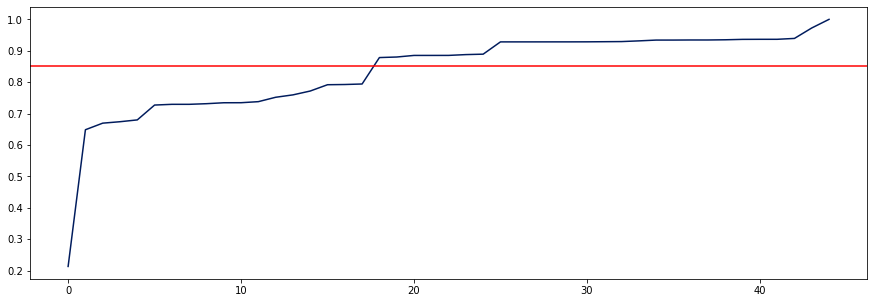

In [120]:
def rmsle(predicted, real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5


model = ensemble.RandomForestRegressor(n_jobs=-1, n_estimators = 100, random_state=42)
model.fit(X_train, Y_train)

# Graphs section
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(111)
plt.plot(np.cumsum(model.feature_importances_))
plt.axhline(0.85,color= 'r')

NUM_OF_FEATURES = 50

col = pd.DataFrame({'importance': model.feature_importances_, 'feature': X_train.columns}).sort_values(
    by=['importance'], ascending=[False])[:NUM_OF_FEATURES]['feature'].values

X_train = X_train[col]
X_test = X_test[col]

In [121]:
len(col)

45

In [122]:
# Define evaluation method for a given model. we use k-fold cross validation on the training set. 
# The loss function is root mean square logarithm error between target and prediction
# Note: train and y_train are feeded as global variables

NUM_FOLDS = 5
def rmsle_cv(model,strategy):
        kf = KFold(NUM_FOLDS, shuffle=True, random_state=42).get_n_splits(X_train.values)
        rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = kf))
        return(rmse)

# Ensemble method: model averaging
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # We define clones of the original models to fit the data in
    # the reason of clone is avoiding affect the original base models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, 
                             gamma=1.5, 
                             learning_rate=0.02, 
                             max_depth=12, 
                             n_estimators=1000,
                             subsample=0.7, 
                             objective='reg:linear',
                             booster='gbtree',
                             reg_alpha=0.0, 
                             eval_metric = 'rmse', 
                             silent=1, 
                             random_state =7,
                            )

model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=144,
                              learning_rate=0.005, 
                              n_estimators=1000, 
                              max_depth=12,
                              metric='rmse',
                              is_training_metric=True,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              verbose=-1,
                              bagging_freq = 5, 
                              feature_fraction = 0.9)

l_m = []
l_std = []
time_d = {}

print("GET DUMMIES, FEATURES SELECTION, KEEP MISSING VALUES\n")

start = time.time()
score_1 = rmsle_cv(model_xgb,1)
end = time.time()

l_m.append(score_1.mean())
l_std.append(score_1.std())
time_d['XGB']= end - start
print("    Xgboost score : {:.4f} ({:.4f})".format(score_1.mean(), score_1.std()))

start = time.time()
score_1 = rmsle_cv(model_lgb,1)
end = time.time()

l_m.append(score_1.mean())
l_std.append(score_1.std())
time_d['LGB']= end - start
print("    LGBM score    : {:.4f} ({:.4f})" .format(score_1.mean(), score_1.std()))

averaged_models_1 = AveragingModels(models = (model_xgb, model_lgb))

score_1 = rmsle_cv(averaged_models_1,1)

l_m.append(score_1.mean())
l_std.append(score_1.std())
print("    Averaged score: {:.4f} ({:.4f})\n" .format(score_1.mean(), score_1.std()))

print('\nLGB faster than XGB ?',time_d['LGB']>time_d['XGB'])

GET DUMMIES, FEATURES SELECTION, KEEP MISSING VALUES

    Xgboost score : 703436.6122 (184193.0944)
    LGBM score    : 666365.2590 (174185.8228)
    Averaged score: 640842.5391 (198195.4875)


LGB faster than XGB ? False


## LGB

In [125]:
from sklearn import metrics

In [123]:

model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=120,
                              learning_rate=0.005, 
                              n_estimators=1000, 
                              max_depth=12,
                              metric='mae',
                              is_training_metric=True,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              verbose=-1,
                              bagging_freq = 5, 
                              feature_fraction = 0.9)

In [127]:
model_lgb.fit(X_train.values, Y_train)
pred = model_lgb.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Test  R^2 Score : ", metrics.r2_score(Y_test, pred)) 
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0


Mean Absolute Error: 113882.26077893237
Mean Squared Error: 290842316456.8755
Root Mean Squared Error: 539297.9848440706
Test  R^2 Score :  0.6804041610848927


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


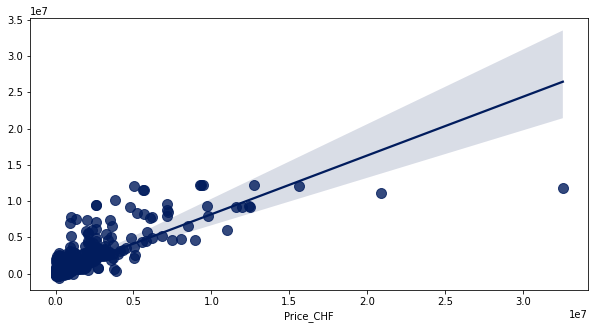

In [128]:
plt.figure(figsize=(10,5))
sns.regplot(Y_test, pred, fit_reg=True, scatter_kws={"s": 100})

Over 5396 boats, the average gap between the predicted price and the real price is 113882


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


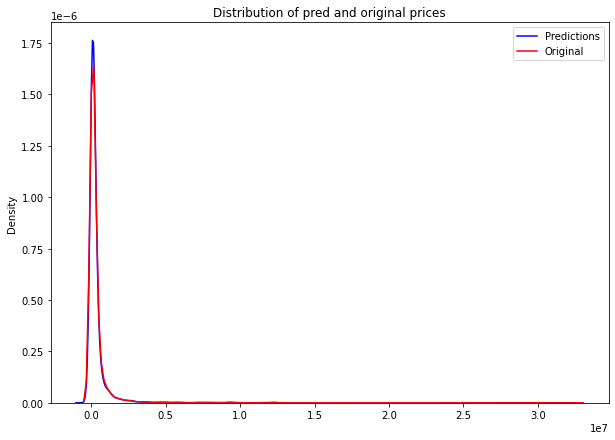

In [129]:
pred = np.array(pred)
original = np.array(Y_test)

def average_gap(l1,l2):
    resu=0
    for i in range(len(l1)):
        resu += np.abs(l1[i]-l2[i])
    resu = resu/len(l1)
    return(resu)

print("Over",len(pred),"boats, the average gap between the predicted price and the real price is",
      round(metrics.mean_absolute_error(Y_test, pred)))

plt.figure(figsize=(10,7))
sns.distplot(pred, color="blue", label="Predictions", hist = False)
sns.distplot(original, color="red", label="Original", hist = False)
plt.title("Distribution of pred and original prices")
plt.legend()

## SHAP (Regression: countinous output)

In [149]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Regression_continuous.PNG to Regression_continuous.PNG


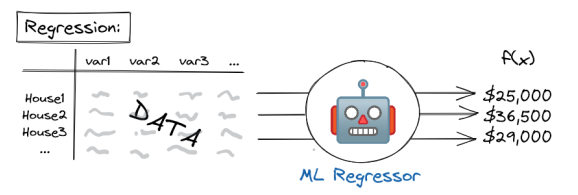

In [154]:
Image('Regression_continuous.PNG', width=500)

What is SHAP?

The SHAP stands for SHapley Additive exPlanations and uses the approach of game theory to explain model predictions.

SHAP is a method that explains how individual predictions are made by a machine
learning model. SHAP deconstructs a prediction into a sum of contributions from
each of the model's input variables. For each instance in the data (i.e. row), the
contribution from each input variable (aka "feature") towards the model's prediction
will vary depending on the values of the variables for that particular instance.

1.Load shap library

In [131]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.6 MB/s 


2. Create Explainer Object

The explainer generally takes the ML model and data as input and returns an explainer object which has SHAP values 

At first, we'll need to create an explainer object in order to compute SHAP value and plot various charts explaining a particular prediction.

In [132]:
# explain the model's predictions using SHAP values

explainer = shap.TreeExplainer(model_lgb)

3. Generate SHAP values for data examples using the explainer object.

In [133]:
shap_values = explainer.shap_values(X_train)

In [148]:
print('Shap Values df shape', shap_values.shape)
print('X_train df shape', X_train.shape)
pd.DataFrame(shap_values.values, columns= X_train.columns).head()

Shap Values df shape (3433, 45)
X_train df shape (3433, 45)


,Width (m),Length (m),age_boat,Number of beds,Boat Type_More_80pct,total_HP,total_kW,Depth (m),kW_per_engine,Engine Hours,horse_Power_per_engine,Number_motors,Number of Cabins,Type_USED_BOAT,Cert Number of People,Fuel Capacity (l),Fresh Water Cap (l),Fuel Type_missing,Boat Type_More_20pct,Material_Medium,Number of Toilets,Material_High,Number of Showers,Type_NEW_BOAT,Max Speed (knots),Boat Type_More_50pct,Fuel Type_Diesel,Cruising Speed (knots),Propulsion_missing,Condition_new,Condition_missing,Propulsion_Inboad,Fuel Type_Other,Holding Tank (l),Condition_good,Boat Type_Moins_20pct,Manufacturer_Other,Propulsion_Drive,Type_display_missing,Fuel Type_Unleaded,Manufacturer_Jeanneau power boats,Condition_Other,Number of Bathrooms,Manufacturer_Bénéteau power boats,Propulsion_Outbord
0,-9.441783e+04,-116451.764429,155318.135007,-13766.052876,6025.446421,-1.526660e+04,950.297788,-20581.312914,-11163.292843,40236.719582,-896.619457,3398.504922,1354.167811,5254.952103,426.044757,-9492.363634,1711.406526,-194.191972,358.553900,-4.109725,-1213.048302,664.736528,-327.544082,1941.211738,-256.347146,-63.840865,10138.624357,-78.024793,3522.472587,1911.723627,-97.806066,-359.301834,-79.913941,-271.579697,60.902083,-3.246995,1543.741019,6364.451166,0.0,1152.184828,175.610205,23.514546,30.015593,61.629935,49.350378
1,-6.824574e+04,-28538.382353,-118589.536075,-14905.812216,-2187.396717,-9.186007e+03,411.661628,-2275.787491,5288.175107,-4459.475369,104.283902,3189.196828,1736.915636,-1058.475242,642.676895,2589.433485,1652.379289,-273.491934,751.226481,-176.463557,795.693037,1032.730809,304.256434,-309.663628,-426.557875,-608.603035,2175.103017,-115.807487,421.746518,-740.214547,-194.185238,-198.335366,-53.321184,-200.854670,-1501.360761,40.024156,552.730312,545.717664,0.0,526.290789,63.393546,20.561577,33.386349,38.971199,23.519885
2,1.080568e+06,639603.538767,-435467.374877,-44506.241224,-97034.395873,1.283562e+06,137152.118528,-15234.831593,32801.885929,-25179.136711,-4376.177477,2990.172519,-13707.029828,-369.525710,-111.343431,16547.210940,-76842.248194,-1220.899756,620.344728,-19.032817,-21168.205911,16809.206890,1022.725669,-114.036996,832.781457,11005.534843,150.539156,1259.751348,116.901168,785.085328,-54.986732,1021.061624,-24.813263,397.644820,29.999308,42.531133,235.635925,-111.843728,0.0,168.217116,27.785851,5.138071,6.761097,18.488891,13.112027
3,-6.181308e+04,-57332.882732,-105350.552759,-15566.543060,-2314.178363,-1.927251e+04,-1329.391895,-7328.996380,-5741.047007,-8356.015590,-613.038493,2761.659505,1016.510005,-649.733269,552.593674,-11.105216,1833.727631,-276.447943,-303.435603,-216.134789,-579.869397,1006.036354,406.480601,-232.826143,-309.005320,-137.973812,-373.491534,-108.434830,-352.851519,3427.975120,-98.497564,-293.823909,-71.370571,159.678454,100.161625,54.608768,338.169527,-159.741964,0.0,-953.119457,40.329262,23.679175,31.433468,32.009912,20.325593
4,2.282611e+03,132241.413353,-100886.199816,-11286.379338,-2166.344658,-1.557179e+04,-1945.031834,5534.942184,21076.453056,-15249.038645,2555.994517,1723.878452,3700.624545,-1249.157481,60.335604,12021.836014,-97.766498,6737.411677,-389.943100,-2066.264506,-1476.724528,815.411187,185.563923,-265.271232,-2557.724684,-545.574467,6028.627362,-461.776410,152.869832,-658.663444,123.327914,-167.334802,-34.092322,-285.050544,158.792962,-32.535476,428.448868,-143.941016,0.0,251.123614,63.697575,23.824790,21.526582,28.828957,12.437776


The output of SHAP is a dataset with the same dimensions as that on which the model was originally trained (i.e. it has the same input variables as columns and the same instances as rows). Instead of containing the values of the underlying data, however, this dataset contains *SHAP values*. Crucially, the machine learning model's predictions for each instance can be reproduced as the sum of these SHAP values,
plus a  **fixed base value**, such that the model output, *f(x) = base value + sum(SHAP values).*

For regression models, the base value is equal to the mean
of the target variable (e.g. the mean boat price in the dataset)

In [160]:
base_value = np.mean(Y_train)
round(base_value, 2)

320662.62

Saving Regression_continuous_SHAP.PNG to Regression_continuous_SHAP (2).PNG


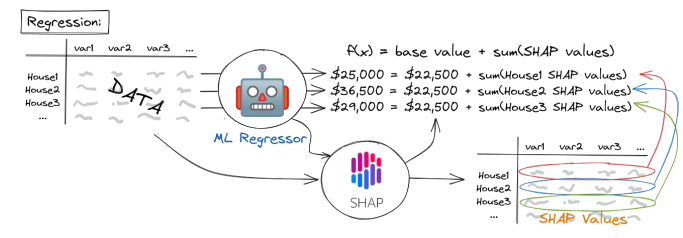

In [157]:
uploaded = files.upload()
Image('Regression_continuous_SHAP.PNG', width=700)

4. Create various visualizations using those shap values explaining prediction.

### Vizualisation Charts

#### Local interpretability

**Local interpretability: explaining individual predictions**


Explaining predictions for individual instances of the data is referred to as local interpretability. SHAP explains how individual predictions are arrived at in terms of contributions from each of the model's input variables. This is a highly intuitive approach that produces simple but informative outputs.

In [134]:
sample_idx= 0

explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_train)

print("Real Value : ", Y_train[0])
print("Base value : ", np.mean(Y_train))

print("Expected value : ", explainer.expected_value)
print("SUM of SHAP value : ", shap_values[sample_idx].sum())
print("Shap Values for Sample %d : "%sample_idx, shap_values[sample_idx])
print("\n")
print("Prediction From Model : ", model_lgb.predict(X_train.values)[sample_idx])
print("Prediction From Adding SHAP Values to Base Value : ", explainer.expected_value + shap_values[sample_idx].sum())

Real Value :  290010.0
Base value :  320662.6248412467
Expected value :  320447.41878833255
SUM of SHAP value :  -42310.39631944926
Shap Values for Sample 0 :  [-9.44178306e+04 -1.16451764e+05  1.55318135e+05 -1.37660529e+04
  6.02544642e+03 -1.52666016e+04  9.50297788e+02 -2.05813129e+04
 -1.11632928e+04  4.02367196e+04 -8.96619457e+02  3.39850492e+03
  1.35416781e+03  5.25495210e+03  4.26044757e+02 -9.49236363e+03
  1.71140653e+03 -1.94191972e+02  3.58553900e+02 -4.10972534e+00
 -1.21304830e+03  6.64736528e+02 -3.27544082e+02  1.94121174e+03
 -2.56347146e+02 -6.38408654e+01  1.01386244e+04 -7.80247929e+01
  3.52247259e+03  1.91172363e+03 -9.78060657e+01 -3.59301834e+02
 -7.99139414e+01 -2.71579697e+02  6.09020828e+01 -3.24699466e+00
  1.54374102e+03  6.36445117e+03  0.00000000e+00  1.15218483e+03
  1.75610205e+02  2.35145459e+01  3.00155932e+01  6.16299345e+01
  4.93503785e+01]


Prediction From Model :  278137.022468882
Prediction From Adding SHAP Values to Base Value :  278137.0224

#####  Waterfall plots

Waterfall plots the most complete display of a single prediction.
Below, an example waterfall plot explains the underlying contributions of each feature to the
prediction for the median-priced boat in the dataset. The waterfall structure
emphasises the additive nature of positive and negative contributors, and how they
build on the base value to yield the model's prediction, f(x).

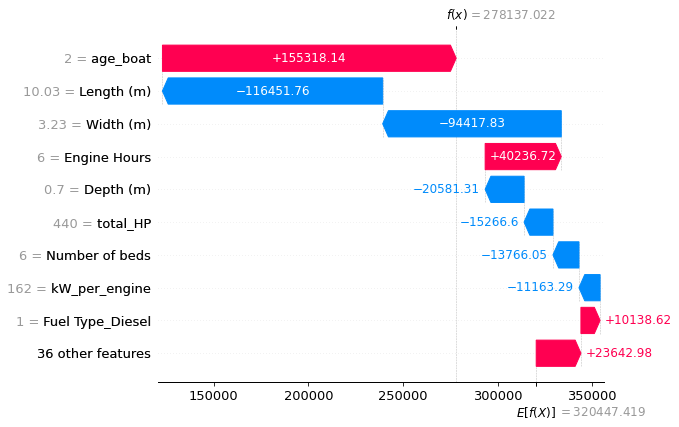

'waterfall chart shows how shap values of individual features are added to the base value\n in order to generate a final prediction. '

In [135]:
shap.initjs()

shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0], 
                     max_display=10, 
                     show=True)
#plt.show()
'''waterfall chart shows how shap values of individual features are added to the base value
 in order to generate a final prediction. '''

##### Force Plot

Whereas waterfall plots are expansive and spare no detail when explaining a
prediction, force plots are equivalent representations that display the key information
in a more condensed format

Base Value :  320662.6248412467


'Force plots are useful for examining explanations for multiple instances of the data at once,   \nas their compact construction allows for outputs to be stacked vertically for\nease of comparison '

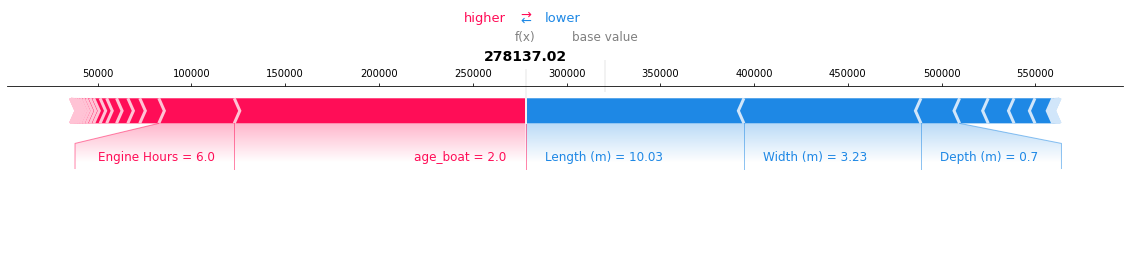

In [136]:
# visualize the first prediction's explanation

shap.initjs()
print('Base Value : ', np.mean(Y_train))

shap.plots.force(shap_values[0], show=False, matplotlib=True)

'''Force plots are useful for examining explanations for multiple instances of the data at once,   
as their compact construction allows for outputs to be stacked vertically for
ease of comparison '''

*In a force plot, variables with SHAP values that 'push' the model towards a higher price appear o the left in red, 
whereas those that push the model towards a lower price appear onth the rght in blue.*

*The actual value of the variale is show alongside the variable name. Variables with larger SHAO value (more impact) have larger arrows.*

#### Global interpretability

**Global interpretability: understanding drivers of predictions**


The goal of global interpretation methods is to describe the expected behaviour of a
machine learning model with respect to the whole distribution of values for its input
variables. With SHAP, this is achieved by aggregating the SHAP values for individual
instances across the entire population.

##### Bar Plots

The simplest starting point for global interpretation with SHAP is to examine the
mean absolute SHAP value for each feature across all of the data. This quanti es, on
average, the magnitude (positive or negative) of each feature's contribution towards
the predicted house prices. Features with higher mean absolute SHAP values are
more in uential. Mean absolute SHAP values are essentially a drop-in replacement
for more traditional feature importance measures but have two key advantages:



1.   Mean absolute SHAP values are more theoretically rigorous, 
and relate to which
features impact predictions most (which is usually what we're interested in).
Conventional feature importances are measured in more abstract and
algorithm-speci c ways, and are determined by how much each feature
improves the model's predictive performance.
2.   Mean absolute SHAP values have intuitive units - for this example, they are quantified in dollars, like the target variable. Feature importances are often expressed in counterintuitive units based on complex concepts such as tree algorithm node impurities.





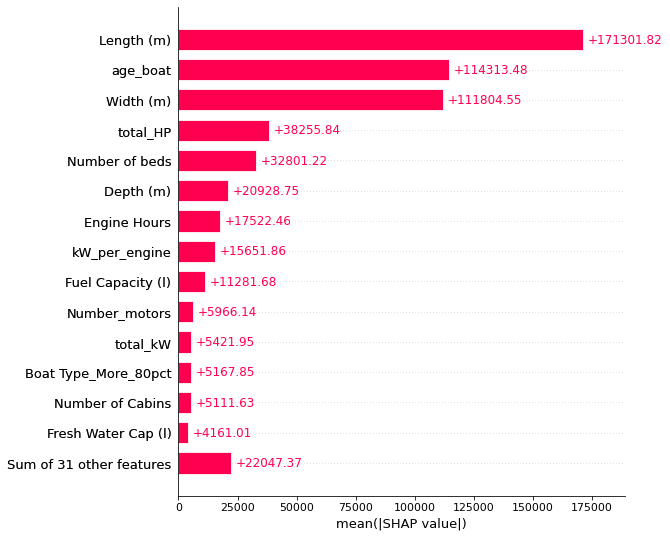

In [137]:
'''Mean absolute SHAP values are typically displayed as bar plots that rank features
by their importance. 
The key characteristics to examine are the ordering of features and the relative magnitudes 
of the mean absolute SHAP values.
Here we see that <<Length>> is the most influential variable, contributing on
average ±CHF 171301.82 to each predicted house price. By contrast, the least informative
variable, <<Fresh Water Cap>>, contributes only ± CHF 4161 '''

shap.plots.bar(shap_values, max_display=15, show=False)

##### Beeswarm plots

SHAP feature importance bar plots are a superior approach to traditional alternatives but in isolation, they provide little additional value beyond their more rigorous theoretical underpinnings. Beeswarm plots are a more complex and information-rich display of SHAP values that reveal not just the relative importance of features, but their actual relationships with the predicted outcome.

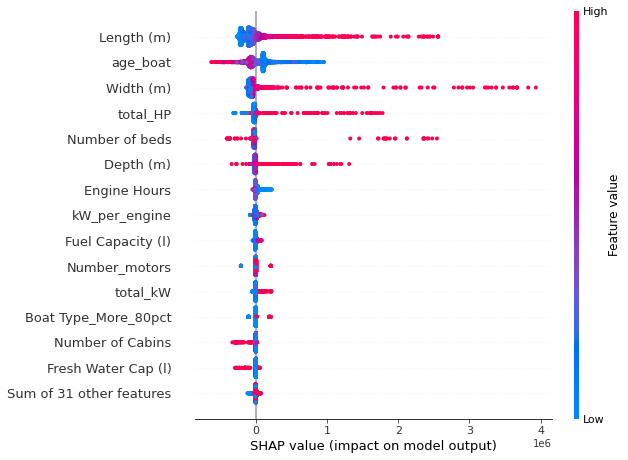

In [138]:
shap.plots.beeswarm(shap_values, max_display=15, show=False)

In beeswarm plot for each variable, every instance of the dataset appeara as it's own point. THe points are distributed horizantally along x-axis according to their SHAP value. In places where ir's a high density, hte points are stacked vertically.
Examining how the SHAP values are distributed reveals how a variable can may influence the model's prediction.

THe color bar corresponds to the raw values of the acutal data for each instance (i.e point) in the graph. If the value o the variable for a particular instance is relatvely high, it appears as a red point, otherwise blue.
Examining the color distribution horizontally along the x axis for each variable provides insights into the genral relationship between a variable's raw value and its SHAP value.

